In [6]:
# pytorch broadcast
# wT x + b  = z; x = colmn vecvtor, W= column vector
import torch
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
print(a*b)
print(a + 1) # implicit broadcast

# opportunities for parallelism in matrix mul
# 1. compute dot product in parallel
# 2. multiple dot products in parallel

# Xw + b = z, X = (n,m), w = (m,1), z = (n,1)

X = torch.arange(6).view(2,3)
print(X.shape, X)

w = torch.tensor([1,2,3]) # shape [3]
print(w.shape, w)

Y = X.matmul(w)
print(Y.shape, Y)

w = w.view(-1,1) # '-1' tells PyTorch to automatically calculate the size of this dimension based on the other dimensions and the total number of elements in the tensor. '1' specifies that the second dimension of the reshaped tensor should have a size of 1.
print(w.shape, w) # shape [3,1]

Y = X.matmul(w)
print(Y.shape, Y)

# broadcast example: add a (2,3) and (1,3). i.e implicit dim gets added and elments are duplicated. here the (1,3) gets replicated to create a (2,3) matrix
X = torch.arange(6).view(2,3)
print(X.shape, X)
w = torch.tensor([1,2,3])
print(w.shape, w)

print (X + w)

# another example https://jeskin.net/blog/pytorch-broadcasting-mechanics/

tensor([ 4, 10, 18])
tensor([2, 3, 4])
torch.Size([2, 3]) tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([3]) tensor([1, 2, 3])
torch.Size([2]) tensor([ 8, 26])
torch.Size([3, 1]) tensor([[1],
        [2],
        [3]])
torch.Size([2, 1]) tensor([[ 8],
        [26]])
torch.Size([2, 3]) tensor([[0, 1, 2],
        [3, 4, 5]])
torch.Size([3]) tensor([1, 2, 3])
tensor([[1, 3, 5],
        [4, 6, 8]])


In [7]:
# prompt: check gpu device in pytorch

import torch

if torch.cuda.is_available():
    device = torch.device("cuda")          # Use GPU
    print("GPU is available")
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")            # Use CPU
    print("GPU is not available, using CPU instead")


GPU is not available, using CPU instead


In [8]:
# prompt: download the url https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/ch02/01_main-chapter-code/the-verdict.txt

!wget https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/ch02/01_main-chapter-code/the-verdict.txt


--2025-03-19 04:16:24--  https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/ch02/01_main-chapter-code/the-verdict.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20479 (20K) [text/plain]
Saving to: ‘the-verdict.txt’

the-verdict.txt     100%[===================>]  20.00K  --.-KB/s    in 0.003s  

2025-03-19 04:16:24 (6.07 MB/s) - ‘the-verdict.txt’ saved [20479/20479]



In [9]:
! ls


readme	     SMSSpamCollection.tsv  test.csv	     train.csv
sample_data  smsspamcollection.zip  the-verdict.txt  val.csv


In [10]:
with open('the-verdict.txt', 'r', encoding='UTF-8') as f:
    raw_text = f.read()

print ("total number of char", len(raw_text))
print (raw_text[:1000])

total number of char 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like agai

In [11]:
import re
# example usage of re to split and remove whitespaces. # removing white spaces depends on teh application. keeping whitespaces, can be useful, that are sensitive to the exact structure e.g code.
# we remove them here for simplicity and reduced memory.
text = "Hello, world. this, is a test line."
result = re.split(r'([,.]|\s)', text)
result = [item for item in result if item.strip()]
print(result)

text2 = "hello, world. is this-- a test?"
regex = r'([,.:;?_!"()\']|--|\s)'
result = re.split(regex, text2)
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'this', ',', 'is', 'a', 'test', 'line', '.']
['hello', ',', 'world', '.', 'is', 'this', '--', 'a', 'test', '?']


In [12]:
# extract tokens from the raw text of the book
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item for item in preprocessed if item.strip()]
print ("total number of tokens", len(preprocessed))
print (preprocessed[:100])

total number of tokens 4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--']


In [13]:
# convert to token IDs. build a vocab sorted. each token is mapped to a token ID from the sorted list.
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print ("vocab size", vocab_size)

vocab = {token:i for i, token in enumerate(all_words)}

for i, item in enumerate(vocab.items()):
    print (i, item)
    if i > 10:
        break

vocab size 1130
0 ('!', 0)
1 ('"', 1)
2 ("'", 2)
3 ('(', 3)
4 (')', 4)
5 (',', 5)
6 ('--', 6)
7 ('.', 7)
8 (':', 8)
9 (';', 9)
10 ('?', 10)
11 ('A', 11)


In [14]:
# prompt: create a python class with encode and decode method

import torch
import re

class SimpleTokenizerV1:
    def __init__(self, vocab):
      self.str_to_int = vocab
      self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, raw_text):
      preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
      preprocessed = [item for item in preprocessed if item.strip()]
      return [self.str_to_int[item] for item in preprocessed]

    def decode(self, ids):
      text = " ".join([self.int_to_str[item] for item in ids])
      # `r'\s+([,.:;?_!"()\'])'`**: This is the regular expression pattern being searched for.
      # `\s+`**: Matches one or more whitespace characters (spaces, tabs, newlines).  The `+` means "one or more" of the preceding character or group.
      # `([,.:;?_!"()\'])`**: This is a capturing group.  It matches any single character within the square brackets (`,`, `.`, `:`, `;`, `?`, `_`, `"`, `!`, `(`, `)`, `'`). The parentheses create a capturing group, which means the matched punctuation will be stored for later use.
      # `r'\1'`**: This is the replacement string.  `\1` refers to the first captured group in the regular expression pattern.  So, it replaces the matched whitespace characters and the punctuation mark with just the punctuation mark itself.  Any preceding whitespace is effectively removed.
      text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
      return text

In [15]:
tokenizer = SimpleTokenizerV1(vocab)
text = """--even through the prism of Hermia's tears I felt able to face the fact with equanimity. Poor Jack Gisburn! The women had made him--it was fitting that they should mourn him. Among his own sex fewer regrets were heard, and in his own trade hardly a murmur. Professional jealousy?"""
ids = tokenizer.encode(text)
print(ids)

[6, 399, 1007, 988, 795, 722, 50, 2, 850, 976, 53, 436, 117, 1016, 418, 988, 420, 1108, 395, 7, 80, 57, 38, 0, 93, 1112, 514, 654, 546, 6, 585, 1077, 444, 987, 994, 879, 687, 546, 7, 13, 549, 742, 872, 438, 829, 1088, 536, 5, 157, 568, 549, 742, 1026, 528, 115, 694, 7, 81, 589, 10]


In [16]:
print(tokenizer.decode(ids))

-- even through the prism of Hermia' s tears I felt able to face the fact with equanimity. Poor Jack Gisburn! The women had made him -- it was fitting that they should mourn him. Among his own sex fewer regrets were heard, and in his own trade hardly a murmur. Professional jealousy?


In [17]:
# special context token to handle unknown tokens. Modify the vocab to add special tokens '<|unk|>' '<|endoftext|>'. Say we need to deal with multiple docs, we add <|endoftext|> in the beg of each doc. It signals markers. improves LLM understanding
# some additionla tokens BOS -  beg of sequence, EOS - end of sequence (similar to endoftext), PAD - shorter text are padded to extended to the longest sequence size of the batch
# GPT uses subword tokenizer so doesnt need to use <|unk|>

all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(['<|endoftext|>','<|unk|>'])
vocab = {token:id for id, token in enumerate(all_tokens)}
print ("vocab size", len(vocab.items()))

for i, item in enumerate(list(vocab.items())[-5:]):
    print (item)


vocab size 1132
('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [18]:
import torch
import re

class SimpleTokenizerV2:
    def __init__(self, vocab):
      self.str_to_int = vocab
      self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, raw_text):
      preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
      preprocessed = [item for item in preprocessed if item.strip()]
      preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
      return [self.str_to_int[item] for item in preprocessed]

    def decode(self, ids):
      text = " ".join([self.int_to_str[item] for item in ids])
      text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
      return text

In [19]:
text1 = "hello, do you like tea?"
text2 = "In the sunlit terraces of the palace"
text = "<|endoftext|> ".join((text1, text2))
print (text)

hello, do you like tea?<|endoftext|> In the sunlit terraces of the palace


In [20]:
tokenizer = SimpleTokenizerV2(vocab)
ids = tokenizer.encode(text)
print(ids)
print(tokenizer.decode(ids))

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131]
<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>


In [21]:
# chapter: BPE (source: https://www.youtube.com/watch?v=fKd8s29e-l4&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=9)
# BPE tokenization
# why we need this?
# word based, sub-word based, char based tokenizers
# word based problems: out of vocab words, different meaning of similar words (e.g boy, boys).
# char based problems: very small vocab, meaning associated with the words lost. tokenized sequence much longer than the original text
# sub word: does capture root words, (e.g treat boy as a common root word).
# sub word rules:  a) do not split frequently used words into subwords b) split rare words into smaller meanigful subwords. This helps model learn that different words with same root wrod are similar meaning. This menaing is lost in word and char based tokenization.
# it also helps model learn that words are made up of root words and suffixes like 'ization'.

# BPE is a subword tokenization algo. introduced in 1994. data compression algo. we scan the data, most common pair of consecutive bytes of data is replaced with a byte that does not exist in the data.
# aaabdaaabac
# byte pair 'aa' occurs the most 4 times. replace this with a byte like 'Z'
# compressed data: ZabdZabac
# next common byte pair is 'ab'. replace this by 'Y', compressed data is ZYdZYac. we dont need to replace 'ac' since it occurs only once.
# replace 'ZY' with W. WdWac

# in LLM we use BPE to  represent a token for the most common words. rare words are broken down into 2 or more sub words

# we have old:7, older:3, finest:9, lowest:4 -> dataset of words. we need to add '</w>' as end of word token (preprocessing step)
# old</w>:7, older</w>:3, ...

# 1. split all words into char and make a freq table. e.g </w>: 23 times
# 2. lookup the most frequent occruing pair and merge. e.g es appears 13 times.  a new token es is added to the table. and the freq of e and s subtract the frequency. subtract 13 from e and s. e:16-13=3, s:13-13=0
# 3. now es becomes a token, and es t more frequntly occuring pair. add est to the freq table, and subtract the amount from es and t. we are slowly identifying common root words. Similarly we iterate to find est</w>. This is important to note that we can now differentiate between 'estimate' and 'highest', where ending est if more frequently occuring.
# 4. ... stopping criteria can be token count or number of iterations.

# BPE it also solves out of vocab problem. but also now solves the common root problem encountered in word level encoding.




In [22]:
# OSS BPE implementation
! pip install tiktoken

In [23]:
import importlib
import tiktoken
print (importlib.metadata.version("tiktoken"))

tokenizer = tiktoken.get_encoding("gpt2")
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace"
)
ids = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print (ids)
print(tokenizer.decode(ids))

# 50256 is the <|endoftext|>
# how does BPE handle unknown words without the <|unk|>? BPE can represent unseen woeds as sub word tokens or chars
ids = tokenizer.encode("Akwirw ier")
print(ids)
print(tokenizer.decode(ids))

0.9.0
[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271]
Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace
[33901, 86, 343, 86, 220, 959]
Akwirw ier


In [24]:
# Chapter: creating input batches for LLM (source: https://www.youtube.com/watch?v=iQZFH8dr2yI&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=9)
# create input, target pairs from the input text is the goal here.
# text sample:
# llms learn to predict one word at a time
# the pairs are as follows:
# llms -> learn
# llms learn -> to
# llms learn to predict -> one
# what comes after the prediction is masked in auto-regressive models. unsupervised learning. used for pre-trainig the llm.
# given a text sample:
# 1. extracting input blocks, that serve is input to the llm.
# 2. llm task is the predict the next word or token
# 3. we will mask out all words beyond the target

In [25]:
import tiktoken
with open('the-verdict.txt', 'r', encoding='UTF-8') as f:
    raw_text = f.read()

tokenizer = tiktoken.get_encoding("gpt2")
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))


# e.g. input   x: [1,2,3,4]
#      output: y: [2,3,4,5]
# if 1,2 is i/p, o/p is 3 and so on.
# here the size 4 is the context size. we can give upto 4 tokens as input here

context_size = 4
enc_sample = enc_text[50:]
print (enc_sample)
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print (f"x: {x}")
print (f"y: {y}")


# num of predictions = context size
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print (context, "------>", desired)

print("decoded text")
# num of predictions = context size
for i in range(1, context_size+1):
  context = enc_sample[:i]
  desired = enc_sample[i]
  print (tokenizer.decode(context), "------>", tokenizer.decode([desired]))

5145
[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 536, 48819, 508, 25722, 276, 13, 11161, 407, 262, 40123, 18113, 544, 9325, 701, 11, 379, 262, 938, 402, 1617, 261, 12917, 905, 11, 5025, 502, 878, 402, 271, 10899, 338, 366, 31640, 12, 67, 20811, 1, 284, 910, 11, 35

In [26]:
# implement a data loader that fetches the i/p, o/p pair in a sliding windown pattern.
# x = tensor( [
#     ['In', 'the' , 'heart', 'of'],
      # ['the', 'city', 'stood', 'the'],
# ])

# y = tensor([
#     ['the', 'heart', 'of', 'the'],
#     ['city', 'stood', 'the', 'old'],
# ])

# Each row of X represents one input context, correspoinding row of Y represents the output (made by shifting the input by 1 position).
# Each ip op pair contains 'context_size' number of prediction samples.

from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
  def __init__(self, text, tokenizer, max_length, stride):
    """
    max_length: context_length
    text: raw text
    tokenizer: BPE tokenizer
    stride: sliding window stride
    """
    self.input_ids = []
    self.target_ids = []
    token_ids = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
    for i in range(0, len(token_ids)-max_length, stride):
      input_chunk = token_ids[i:i+max_length]
      target_chunk = token_ids[i+1:i+max_length+1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.target_ids[idx]

In [27]:
def create_dataloader_v1(text, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
  tokenizer = tiktoken.get_encoding("gpt2")
  dataset = GPTDatasetV1(text, tokenizer, max_length, stride)
  return DataLoader(dataset,
                    batch_size=batch_size,
                    shuffle=shuffle,
                    drop_last=drop_last,
                    num_workers=num_workers)

In [28]:
import torch
print("torch version", torch.__version__)

with open('the-verdict.txt', 'r', encoding='UTF-8') as f:
    raw_text = f.read()

print("batch size 1, stride 1")
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(dataloader)
x, y = next(data_iter)
print(x)
print(y)

print("batch size 8, stride 4")
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)
data_iter = iter(dataloader)
x, y = next(data_iter)
print(x)
print(y)

# some tradoff to think about:
# smaller batch size uses less memory, but noisy model updates. its a hyperparam to explore.
# low stride could lead to overfitting

torch version 2.6.0+cu124
batch size 1, stride 1
tensor([[  40,  367, 2885, 1464]])
tensor([[ 367, 2885, 1464, 1807]])
batch size 8, stride 4
tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [29]:
# Chapter: Token embeddings (source: https://www.youtube.com/watch?v=ghCSGRgVB_o&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=10)
# embedding dimension, model
# why embeddings are needed?
# - computer needs numerical representation of all_words
# - why not use 1d embeddings? we cannot use random numbers, some words are relatd to other words. Just assigning number doesnt capture semantic meaning between words
# - why cnn work well? they dont use individual pixel only, they encode spatial relation between pixels. inherently present in an image.
# one hot encoding -  assing 1 to each token. this also leads to similar problem like random number. this also fails to capture semantic relation.

# how many dimension - what if this is determined by features? e.g has a tail, eatbale, has 4 legs, makes sound, is a pet. (for dog, cat, apple, banana). vectors can capture semantic meaning.
# can we create a NN which learns how to represent the vector embedding of the tokens.

In [30]:
# commented out since this is a 1.6G download
# import gensim.downloader as api
# model = api.load("word2vec-google-news-300")
# word_vectors = model
# word_vectors.most_similar(positive=['king', 'man'], negative=['woman'], topn=1)
# word_vectors.similarity('king', 'man')

In [31]:
# for llm, embeddings are randomly intialized. the params are learnt during the training via backpropagation.
# embedding matrix = token ID X vector dimension. token dimension = vocab size. vector dimension is a hyper param. e.g 768 for gpt2
vocab_size = 6 # num tokens
output_dim = 3 # vector dimension of embeddings

torch.manual_seed(123)
# embedding_layer can be thought as a neural network with input dimension of vocab_size, and output neurons of size output_dim. Output X.WT. W is weight matrix of dimension vocab_size * output_dim. token id are covnerted to one hot representation and passed as input to the NN. (torch.nn.linear). both embedding and linear get to the same output. its not efficient due to one hot encoding.
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

# print the vector for token id 3
print(embedding_layer.weight[5])

idx = torch.tensor([2,3,1]) # retrive vectors for token ID 2,3,1
print(embedding_layer.weight[idx])

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)
tensor([-2.8400, -0.7849, -1.4096], grad_fn=<SelectBackward0>)
tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<IndexBackward0>)


In [32]:
# Chapter: Positional encoding (source: https://www.youtube.com/watch?v=ufrPLpKnapU&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=11)
# In embedding, same token Id gets converted to same embedding. it is useful to encode the postio where the token appears.
# 2 types - absolute and relative
# absolute emb - each position in i/p sequence, a unique embedding is added to token emb. pos vectors has same dimension as token emb.
# relative emb - relative pos distance between tokens. "how far apart" is learnt by the model. the model can generalize better sequnece of varying length, that the model has not seen in training phase. e.g longer sequence

# GPT was trained using absolute. the positional emb was learnt during the traning of the model itself.

In [33]:
vocab_size = 50257
output_dim = 256
token_emb_layer = torch.nn.Embedding(vocab_size, output_dim)
max_length = 4 # context length
batch_size = 8
dataloader = create_dataloader_v1(raw_text, batch_size=batch_size,max_length=max_length, stride=max_length, shuffle=False)
# this makes input 8 X 4 (batch dim, tokens). For each token convert to a 256 dim vector using the token_emb_layer which is a (vocab_size, output_dim) matrix.
data_iter = iter(dataloader)
inputs, target = next(data_iter)
print("Token IDs:\n", inputs)
print("Input shape:\n", inputs.shape)

token_embeddigs = token_emb_layer(inputs)
print("token emb dim", token_embeddigs.shape)

# now lets create the pos emb
context_length = max_length
pos_emb_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_emb_layer(torch.arange(max_length))
print("pos emb dim", pos_embeddings.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Input shape:
 torch.Size([8, 4])
token emb dim torch.Size([8, 4, 256])
pos emb dim torch.Size([4, 256])


In [34]:
# Summarizing the data preprocessing pipeline of LLM
# 4 steps
# - tokenization (subword), token embeddings, pos embeddings, input embeddings

# Stages of LLM
# building llm -> data preprocess, attention, llm arch
# foundation model -> training loop, model eval, load pre-trained weights
# finetuning

Attention mechanism (source: https://www.youtube.com/watch?v=XN7sevVxyUM&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=13 )

lets say "the cat that was sitting on the mat, which was sitting next to the dog, jumped"

llm needs to pay attention that the cat is 'sitting' 'jumped'. the key action is jumped, cat is the main subject. also need understandig of other dependencies of the cat.

study plan:
- simplified attention
- self attention (introduce the trainable weights)
- causal attention (only look at previous tokens to predict the next token for auto regressive models)
- multi-head attention (extension of self attention, allows the model to simulatnously attend to info from different representation spaces)


problem statement: long sequences.

what is problem with arch that came before llms? e.h word by word translation does not work (needs contextual understandig and grammar alignment). to address this models need to have some notion of memory

encoder - processes the entire text and captures the semantic menaing in the context vector. this is passed to the decoder. RNN was such encoder decoder architecture. hidden state was an innovation in RNN. hidden state is updated as it ingests more input in the sequence. the final hidden state is the encoder output.

decoder -

why attention? in RNN , decoder only has access to the final hidden state. for long sequences its inefficient. RNN cannot access the intermediate hidden states during decoding phase. this leads to loss of context (specially for long sequences)

Bahdanau attention mechanism in 2014 (precursor to the 'attention is all you need' paper in 2017).
modify the RNN, decoder can selectively access the different parts of the input sequence at each decoding step.

1980 - RNN
1997 - LSTM (solve the vanishing gradient problem of RNN)
2014 - Bahdanau Attention (access intermediate hidden state)
2017 - Transformers (self attention, multi head attention, emergent behavior - trained for next word prediction, learnt translation)


Self attention: allows each position in the seq to attend to all pos in the sequence





In [35]:
# Chapter: simplified attention (https://www.youtube.com/watch?v=eSRhpYLerw4&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=15)
# Your journey starts with one step
# preprocess - token ID, vec embedding and pos encoding in higher dimension
# input x(1) - token 1 embedding
# goal of attention is to create a context vector z(i) for each element x(i) that captures meaning from the input vectors
# we need to find a context vector for each input token x(i)
# lets focus on x(2). the current element is the query. z(2) would contain info about x(2) and all input elements x(1) .. x(t)
# we need to compute w(ij), the attention scores between input x(i) and x(j).

# dot product of vector a and b is |a||b| cos0. higher dot product scores are similar vectors
# this is what is used for attention scores between query vector and the input vector.

import torch
inputs = torch.tensor([
        [0.43, 0.15, 0.89], # your x(1)
        [0.55, 0.87, 0.66],  # journey x(2)
        [0.57, 0.85, 0.64], # starts x(3)
        [0.22, 0.58, 0.33], # with x(4)
        [0.77, 0.25, 0.10],  # one x(5)
        [0.05, 0.80, 0.55], # step x(6)
    ])

print(inputs)


query = inputs[1] # second token x(2), second row in inputs
attn_scores = torch.empty(inputs.shape[0])
for i in range(inputs.shape[0]):
  attn_scores[i] = torch.dot(query, inputs[i])

print("attn_scores:", attn_scores, "shape:", attn_scores.shape)

# normalization: need attention weights to sum to 1 to talk in terms of percentage weightage to the input. also this helps maintain stability in training


attn_weights_2_tmp = attn_scores / torch.sum(attn_scores) # normalization
print(attn_weights_2_tmp.shape)
print("attn_weights_2_tmp:", attn_weights_2_tmp)
print(torch.sum(attn_weights_2_tmp))

# but there are better ways to do normalization. softmax is preferred. use torch softmax which does e^(x1-max) for each element.
def softmax_naive(x):
  return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores)
print("attn_weights_2:", attn_weights_2_naive)
print(torch.sum(attn_weights_2_naive))

# now sum the weights * input for the context vector
query = inputs[1] # second token x(2), second row in inputs
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2_naive[i] * x_i

print(context_vec_2) # context vector for input x(2)

# Summary:
# 1. compute attention scores (dot product of each vector with every other input vector)
# 2. compute attention weights (softmax w)
# 3. compute context vector for the given input vector (w * x)
attn_scores = torch.empty(6,6)

# step 1
# naive for loop
for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_scores[i,j] = torch.dot(x_i, x_j)

print("attn_scores:\n", attn_scores) # each cell (i,j) of attn score between x(i) and x(j)

# simpler way to do this same
attn_scores = torch.matmul(inputs, inputs.T) # input @ input.T
print("attn_scores:\n", attn_scores)

# step 2
# softmax of each row
attn_weights = torch.softmax(attn_scores, dim=-1) # dim param uses last dimension along which softmax would be executed
print("attn_weights:\n", attn_weights)


# verify each row sum to 1
print("attn_weights row sum", torch.sum(attn_weights, dim=-1))


# step 3
# context vector for all input
all_context_vec = attn_weights @ inputs # this scales every row of input (which is x(i) by the attention weight)
print("all_context_vec shape:\n", all_context_vec.shape)
print("all_context_vec:\n", all_context_vec) # every row is the corresponding context vector z(i) of input x(i)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
attn_scores: tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865]) shape: torch.Size([6])
torch.Size([6])
attn_weights_2_tmp: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)
attn_weights_2: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)
tensor([0.4419, 0.6515, 0.5683])
attn_scores:
 tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
attn_scores:
 tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0

why do we need trainable weights for Q,K,V?

"the cat sat on the mat because it was warm"
if we only use dot product,  of the query warm with each word emb, then we might find warm is only similar to itself. words like cat, sat may get low similarity score. with trainable weights model learns to pay attention to cat, mat.

In [36]:
# Chapter: Coding self attention with query, key and value (https://www.youtube.com/watch?v=UjdRN80c6p8&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=15)
# context vector is enriched input vector
# trainable params - allows model to produce good context vector. Wq, Wk, Wv - 3 trainbale weight matrices
# convert input vectors to Q, K , V vectors
# Ip - row i represents the embeddning for token i
# say 6 X 3 input, 6 inputs, 3 emb dimension (d_in). Wq,k,v dimension 3X2. 2 is d_out. project the input into a different dimension space.
# So Ip * Wq, Ip * Wk, Ip * Wv results in Q, K, V matrices (of size 6 X 2).  Each row of Q,K,V matrics corresponds to an input token.
# "scaled dot product attention"

import torch
inputs = torch.tensor([
        [0.43, 0.15, 0.89], # your x(1)
        [0.55, 0.87, 0.66],  # journey x(2)
        [0.57, 0.85, 0.64], # starts x(3)
        [0.22, 0.58, 0.33], # with x(4)
        [0.77, 0.25, 0.10],  # one x(5)
        [0.05, 0.80, 0.55], # step x(6)
    ])

x_2 = inputs[1] # first token
d_in = inputs.shape[1] # emb dimension
d_out = 2 # sample value used for this example
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
print(W_query)


query_2 = x_2 @ W_query
print(query_2, query_2.shape)
key_2 = x_2 @ W_key
print(key_2, key_2.shape)
value_2 = x_2 @ W_value
print(value_2, value_2.shape)



keys = inputs @ W_key
print(keys, keys.shape)
queries = inputs @ W_query
print(queries, queries.shape)
values = inputs @ W_value
print(values, values.shape)


attn_scores = queries @ keys.T
print(attn_scores, attn_scores.shape)

# scale the attn scores by sqrt(emb dimension of keys matrix), here d_keys = 2. so we scale this example by sqrt(2)
# why?
# 1. stability of learning - applying softmax without scaling, values can be disproportionately  high. highest value can consume almost all the prob mass. "peaky softmax"
# in LLM, if dot product between Q and K becomes too large, attn scores can become large. results in sharp softmax distrubution. model can become overly confidet in a key.
# why sqrt(), its related to the variance. dot product increases variance proportionately. dividing the sqrt of dimension keeps variance close to 1.
d_k = keys.shape[-1]
print("scale_factor d_k", d_k)
attn_weights = torch.softmax(attn_scores/ d_k ** 0.5, dim=-1)
print(attn_weights, attn_weights.shape)


# lets compute the context vector
# each row of i of attn_weight, captures the weightage of input i w.r.t to other inputs. we scale each row of V (which represents the value vector corresponding to each input token x), and then sum to get the final context vector
context_vec = attn_weights @ values
print(context_vec, context_vec.shape)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
tensor([0.4306, 1.4551]) torch.Size([2])
tensor([0.4433, 1.1419]) torch.Size([2])
tensor([0.3951, 1.0037]) torch.Size([2])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]]) torch.Size([6, 2])
tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]]) torch.Size([6, 2])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]]) torch.Size([6, 2])
tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114,

In [37]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out) -> None:
      """
      d_in: embedding dimension
      d_out: output dimension of the Q,K,V space
      """
      super().__init__()
      self.W_query = nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
      self.W_key = nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
      self.W_value = nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
      # we can use nn.Linear which has an optimized weight init scheme, which results in stable training.

    def forward(self, x):
      keys = x @ W_key
      queries = x @ W_query
      values = x @ W_value

      attn_scores = queries @ keys.T
      attn_weights = torch.softmax(attn_scores/keys.shape[-1] ** 0.5, dim=-1)

      context_vec = attn_weights @ values
      return context_vec

In [38]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


In [39]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False) -> None:
      """
      d_in: embedding dimension
      d_out: output dimension of the Q,K,V space
      """
      super().__init__()
      # we can use nn.Linear which has an optimized weight init scheme, which results in stable training.
      self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
      keys = x @ W_key
      queries = x @ W_query
      values = x @ W_value

      attn_scores = queries @ keys.T
      attn_weights = torch.softmax(attn_scores/keys.shape[-1] ** 0.5, dim=-1)

      context_vec = attn_weights @ values
      return context_vec

In [40]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


In [41]:
# Chapter: Causal Self attention (https://www.youtube.com/watch?v=h94TQOK7NRA&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=17)
# causal attention is also called masked attention. a special form of self attention. only consider previous and current input tokens.
# this looks like in the attn weight matrix, the upper triangle (above the diagonal) is masked out.

# attn score matrix (unnormalized) -> attn weights (each row sum to 1) -> apply mask -> masked attn weights (again sum to 1 to the subset of the values in a given row)

inputs = torch.tensor([
        [0.43, 0.15, 0.89], # your x(1)
        [0.55, 0.87, 0.66],  # journey x(2)
        [0.57, 0.85, 0.64], # starts x(3)
        [0.22, 0.58, 0.33], # with x(4)
        [0.77, 0.25, 0.10],  # one x(5)
        [0.05, 0.80, 0.55], # step x(6)
    ])

queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
values = sa_v2.W_value(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores/keys.shape[-1] ** 0.5, dim=1)
print(attn_weights)


# use pytorch tril func to create a mask where values would be zero above the diagonal
context_length =  attn_scores.shape[1]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

# note: attn_weights is already influenced by the future items due to the softmax applied on the original attn_scores.
attn_weights_masked = attn_weights * mask_simple
print(attn_weights_masked)
row_sums = attn_weights_masked.sum(dim=1, keepdim=True)
print(row_sums)
attn_weights_masked_norm = attn_weights_masked / row_sums
print(attn_weights_masked_norm)

# a more efficient way is to use the original attn scores, apply upper tril infinity mask -> softmax
# attn_scores_masked = attn_scores.masked_fill(mask_simple == 0, float('-inf'))
# attn_weights_masked = torch.softmax(attn_scores_masked / keys.shape[-1] ** 0.5, dim=1)
# print(attn_weights_masked)

mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print ("mask\n", mask, "bool", mask.bool())
attn_scores_masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print("attn_scores_masked\n", attn_scores_masked)
attn_weights_masked = torch.softmax(attn_scores_masked / keys.shape[-1] ** 0.5, dim=1)
print(attn_weights_masked)



tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)
tensor([[0.1921],
        [0.37

In [42]:
#Dropout - randomly selected neurons in the hidden layer is ignored. this prevents overfitting.
# some neurons become lazy, do not do any work. co dependency problem. a lazy neuron is forced to do the work, when other neuron is dropped out.
# dropout is applied in 2 places:
# 1. after calculating the attn scores
# 2. after applying weights to the value vector

# below code drop out 50% of values.
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example)) # note: all other values are rescaled by that much amount (i.e divided by 1/1-p) to compensate for reduction of active nodes


torch.manual_seed(123)
print("attn_weights_masked\n", attn_weights_masked)
attn_weights_dropout = dropout(attn_weights_masked)
print(attn_weights_dropout)

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])
attn_weights_masked
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)
tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [43]:
# e2e causal attention + dropout class
# we will also introduce batches (>1 input. in the example above "your journey starts with one step" is a single input)
# each sentence has 6 token, each token as 3 dimensional embedding. 2 such sentence is a batch
inputs = torch.tensor([
        [0.43, 0.15, 0.89], # your x(1)
        [0.55, 0.87, 0.66],  # journey x(2)
        [0.57, 0.85, 0.64], # starts x(3)
        [0.22, 0.58, 0.33], # with x(4)
        [0.77, 0.25, 0.10],  # one x(5)
        [0.05, 0.80, 0.55], # step x(6)
    ])
batch = torch.stack((inputs, inputs), dim=0)
print("batch\n", batch.shape, batch)

batch
 torch.Size([2, 6, 3]) tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])


In [44]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False) -> None:
      """
      d_in: embedding dimension
      d_out: output dimension of the Q,K,V space
      """
      super().__init__()
      self.d_out = d_out
      self.dropout = torch.nn.Dropout(dropout) # new diff
      # we can use nn.Linear which has an optimized weight init scheme, which results in stable training.
      self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
      # By registering the mask as a buffer, it becomes a persistent part of the CausalAttention module.
      # It's not treated as a learnable parameter, but it's still stored with the module's state.
      # This makes it convenient to access and use the mask during the forward pass of the attention mechanism.
      # further the buffer will be automatically moved to the appropriate device. we do not need to manually ensure that tensores are on the same device as model params.
      self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1)) #

    def forward(self, x):
      b, num_tokens, d_in = x.shape
      keys = self.W_key(x)
      queries = self.W_query(x)
      values = self.W_value(x)

      print("keys\n",keys)
      # In a 3-dimensional tensor, like the one we're assuming for keys, the dimensions are typically:
      # Dimension (0,1,2): Batch size, Sequence length, Embedding dimension
      # Swapping: transpose(1, 2) swaps the sequence length dimension (1) with the embedding dimension (2).
      print("keys transpose(1,2)",keys.transpose(1,2))
      attn_scores = queries @ keys.transpose(1,2)
      # masked_fill_: This is an in-place operation on the attn_scores tensor.
      # It fills elements of the attn_scores tensor with a specified value (-torch.inf in this case) where a corresponding mask is True
      attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) # new diff
      print("attn_scores\n",attn_scores)
      attn_weights = torch.softmax(attn_scores/keys.shape[-1] ** 0.5, dim=-1)
      print("attn_weights(before dropout)\n",attn_weights)
      # apply dropout to the attn weights
      attn_weights = self.dropout(attn_weights) # new diff
      print("attn_weights(after dropout)\n",attn_weights)

      context_vec = attn_weights @ values
      return context_vec

In [45]:
torch.manual_seed(123)
context_length = batch.shape[1] # num tokens for a single input
d_in = batch.shape[-1] # emb dimension
d_out = 2 # q,k,v space dimension
print("context_length", context_length, "d_in", d_in, "d_out", d_out)
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vec = ca(batch)
print("context_vec\n", context_vec.shape, context_vec)

context_length 6 d_in 3 d_out 2
keys
 tensor([[[-0.5740,  0.2727],
         [-0.8709,  0.1008],
         [-0.8628,  0.1060],
         [-0.4789,  0.0051],
         [-0.4744,  0.1696],
         [-0.5888, -0.0388]],

        [[-0.5740,  0.2727],
         [-0.8709,  0.1008],
         [-0.8628,  0.1060],
         [-0.4789,  0.0051],
         [-0.4744,  0.1696],
         [-0.5888, -0.0388]]], grad_fn=<UnsafeViewBackward0>)
keys transpose(1,2) tensor([[[-0.5740, -0.8709, -0.8628, -0.4789, -0.4744, -0.5888],
         [ 0.2727,  0.1008,  0.1060,  0.0051,  0.1696, -0.0388]],

        [[-0.5740, -0.8709, -0.8628, -0.4789, -0.4744, -0.5888],
         [ 0.2727,  0.1008,  0.1060,  0.0051,  0.1696, -0.0388]]],
       grad_fn=<TransposeBackward0>)
attn_scores
 tensor([[[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
         [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
         [0.1667, 0.2602, 0.2577,   -inf,   -inf,   -inf],
         [0.0510, 0.1080, 0.1064, 0.0643,   -inf,   -inf],
         

In [46]:
# Chapter multi-head attention (https://www.youtube.com/watch?v=cPaBCoNdCtE&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=17)
# dividing attn mechanism into multiple independent heads. when we get the scores, from one set of Q,K,V this is one attention head.
# naive multihead - Creating multiple instances of causalattention class and then combine the output
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False) -> None:
      """
      note: the result output dimension of the final context vector is d_out * num_heads.
      """
      super().__init__()
      self.heads = nn.ModuleList([
        CausalAttention(d_in, d_out, context_length, dropout, qkv_bias=qkv_bias) for _ in range(num_heads)
      ])

    def forward(self, x):
      return torch.cat([head(x) for head in self.heads], dim=-1)

In [47]:
inputs = torch.tensor([
        [0.43, 0.15, 0.89], # your x(1)
        [0.55, 0.87, 0.66],  # journey x(2)
        [0.57, 0.85, 0.64], # starts x(3)
        [0.22, 0.58, 0.33], # with x(4)
        [0.77, 0.25, 0.10],  # one x(5)
        [0.05, 0.80, 0.55], # step x(6)
    ])
batch = torch.stack((inputs, inputs), dim=0)
print("batch\n", batch.shape, batch)

torch.manual_seed(123)
context_length = batch.shape[1] # num tokens for a single input
d_in = batch.shape[-1] # emb dimension
d_out = 2 # q,k,v space dimension
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, dropout=0.0, num_heads=2)
context_vec = mha(batch)
print("context_vec\n", context_vec.shape, context_vec)


batch
 torch.Size([2, 6, 3]) tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])
keys
 tensor([[[-0.5740,  0.2727],
         [-0.8709,  0.1008],
         [-0.8628,  0.1060],
         [-0.4789,  0.0051],
         [-0.4744,  0.1696],
         [-0.5888, -0.0388]],

        [[-0.5740,  0.2727],
         [-0.8709,  0.1008],
         [-0.8628,  0.1060],
         [-0.4789,  0.0051],
         [-0.4744,  0.1696],
         [-0.5888, -0.0388]]], grad_fn=<UnsafeViewBackward0>)
keys transpose(1,2) tensor([[[-0.5740, -0.8709, -0.8628, -0.4789, -0.4744, -0.5888],
         [ 0.2727,  0.1008,  0.1060,  0.0051,  0.1696, -0.0388]],

      

In [48]:
# Chapter: Parallel Multihead Attention (with weight splits) https://www.youtube.com/watch?v=K5u9eEaoxFg&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=18
# Instead of maintaining multiple causal attention instances for each head, have a single MHA class
# in the simple case, for each causal attention, we multiply the input x with Query matrix Wq (one weight matrix per head).
# Instead, let's use a Wq matrix of larger dimension (which combines all the heads) and then split the Query matrix into num_heads matrices. this reduces the number of matrix multiplication
# d_out of the larger weight matrix = head dim * num_heads

# step 1: start with input b , num_tokens, d_in (e.g 1,3,6)
# step 2: dedice d_out, num_heads (say d_out = 6, same as d_in, n_heads = 2. e.g in GPT2 n_heads=96, head_dim - d_out/n_heads. so here head_dim = 3)
# step 3: initialize trainable Wq,k,v weight metrices. d_in is 6, d_out = 6.
# step 4: Calculate K,Q,V matrices (x @ W), dim input is (1,3,6), dim W (6,6) -> result matrix is (1,3,6). 1 is batch, 3 is num tokens, 6 is d_out.
# step 5: we now need a 4th dimension for the head. unroll the last dimension of K,Q,V to include the number of head and head_dim. remember d_out = num_head * head_dim. view (1,3,6) as (1,3,2,3).
# step 6: K,Q,V are grouped by number of token. we group by num of heads (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
# step 7: perf scaled, causal attention with dropout.
# step 8: get back to (b, num_tokens, d_out) for the context vector.
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False) -> None:
      super().__init__()
      assert(d_out % num_heads == 0), "d_out must be divisible by num_heads"
      self.d_out = d_out
      self.num_heads = num_heads
      self.head_dim = d_out // num_heads

      self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.out_proj = nn.Linear(d_out, d_out) # linear layer to combine head outputs
      self.dropout = nn.Dropout(dropout)
      self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
      b, num_tokens, d_in = x.shape
      keys = self.W_key(x)
      queries = self.W_query(x)
      values = self.W_value(x)
      # we unroll the last dim d_out for the head.
      keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
      queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
      values = values.view(b, num_tokens, self.num_heads, self.head_dim)


      # transpose (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim). this is because we will compute attention scores for each head in parallel, so we group by heads.
      keys = keys.transpose(1,2)
      queries = queries.transpose(1,2)
      values = values.transpose(1,2)

      # compute scaled dot-product attention with causal mask. we transpose the num_tokens and head_dim. (think of head_dim as d_out in the simple case we have seen earlier. we need to multiply this with query (b, num_heads, num_tokens, head_dim))
      attn_scores = queries @ keys.transpose(2,3) # dot product for each head in parallel. this dimension is (num_token, num_token).
      bool_mask = self.mask.bool()[:num_tokens, :num_tokens] # original mask is truncated to num_tokens. if num_tokens < context_length
      attn_scores.masked_fill_(bool_mask, -torch.inf)
      attn_weights = torch.softmax(attn_scores/keys.shape[-1] ** 0.5, dim=-1) # keys.shape[-1] is head_dim
      attn_weights = self.dropout(attn_weights)
      context_vec = attn_weights @ values # attn_weight have dim (b, num_heads, num_tokens, num_tokens). values has dim (b, num_heads, num_tokens, head_dim). remember we performed a view operation of the values above to group by num_heads. the output matrix would be (b, num_heads, num_tokens, head_dim)
      context_vec = context_vec.transpose(1,2) # (b, num_heads, num_tokens, head_dim) -> (b, num_tokens, num_heads, head_dim)
      # The transpose() operation might not always result in a contiguous tensor (a tensor where elements are stored sequentially in memory). contiguous() creates a copy of the tensor to ensure it is contiguous, enabling efficient reshaping operations.
      context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out) # (b, num_tokens, num_heads, head_dim) -> (b, num_tokens, d_out)
      context_vec = self.out_proj(context_vec) # optional. This line applies a linear transformation (projection) to the combined output of the multi-head attention mechanism. This projection helps to map the concatenated context vectors from different heads back into the original output dimension
      return context_vec

In [49]:
torch.manual_seed(123)
inputs = torch.tensor(
    [
        [0.43,0.15,0.89,0.55,0.87,0.66],
        [0.57,0.85,0.64,0.22,0.58,0.33],
        [0.77,0.25,0.10,0.05,0.80,0.55],
    ]
)

batch = torch.stack((inputs, inputs), dim=0)
print("batch\n", batch.shape, batch)
batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, dropout=0.0, num_heads=2)
context_vec = mha(batch)
print("context_vec\n", context_vec.shape, context_vec)

# smallest GPT-2 has 12 attention heads, and d_in 768. generally d_in = d_out in GPT models.

batch
 torch.Size([2, 3, 6]) tensor([[[0.4300, 0.1500, 0.8900, 0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400, 0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000, 0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900, 0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400, 0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000, 0.0500, 0.8000, 0.5500]]])
context_vec
 torch.Size([2, 3, 6]) tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)


In [50]:
# Chapter LLM architecture (https://www.youtube.com/watch?v=4i23dYoXp-A&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=19)
# transformer block
# 1. layer norm
# 2. masked Multihead nn.attention
# 3. dropout
# 4. shortcut conn
# 5. dropout
# 6. FF
# 7. dropout

import torch
import torch.nn as nn

# GPT-2 Config (smallest model. note there are other larger variants of gpt-2)
GPT_CONFIG_124M = {
  "vocab_size": 50257,
  "context_length": 1024,
  "emb_dim":768, # d_in
  "n_heads":12, # multi head attention head count per transformer block
  "n_layers": 12, # num transformer blocks
  "drop_rate": 0.1, # dropout
  "qkv_bias": False,
}

# GPT placeholder architeture
class DummyGPTModel(nn.Module):
  def __init__(self, cfg):
    super().__init__()
    self.token_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
    self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
    self.drop_emb = nn.Dropout(cfg["drop_rate"])
    self.trf_blocks = nn.Sequential(*[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
    self.final_norm = DummyLayerNorm(cfg["emb_dim"])
    self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"]) # final projection back from emb dim to vocab dim

  def forward(self, in_idx):
    batch_size, seq_len = in_idx.shape # in_idx is (batch, token id) . token id is obtained from tokenizer like tiktoken for gpt2
    token_embeds = self.token_emb(in_idx) # dimension (batch, token seq, emb)
    # print(token_embeds.shape)
    pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device)) # dim (token seq, emb)
    # print(pos_embeds.shape)
    x = token_embeds + pos_embeds
    x = self.drop_emb(x)
    x = self.trf_blocks(x)
    x = self.final_norm(x)
    logits = self.out_head(x) # (batch, token seq, vocab size)
    return logits

class DummyTransformerBlock(nn.Module):
  def __init__(self, cfg):
    super().__init__()

  def forward(self, x):
    return x

class DummyLayerNorm(nn.Module):
  def __init__(self, cfg):
    super().__init__()

  def forward(self, x):
    return x

In [51]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
print("batch\n", batch)
batch = torch.stack(batch, dim=0)
print("batch\n", batch.shape, batch)

batch
 [tensor([6109, 3626, 6100,  345]), tensor([6109, 1110, 6622,  257])]
batch
 torch.Size([2, 4]) tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [52]:
torch.manual_seed(123)
m = DummyGPTModel(GPT_CONFIG_124M)
logits = m(batch) # the output has 2 rows for the two text samples of the batch. each text consists of 4 tokens, for each token, there is a vocab dim vector of logits. encodes the prob of what token comes next
print(logits.shape,logits)

torch.Size([2, 4, 50257]) tensor([[[-1.4263,  0.1865, -1.0108,  ..., -1.8458, -0.1784, -0.3773],
         [-0.1230,  0.3998, -0.0121,  ..., -0.4483,  1.5452,  1.2868],
         [ 0.6295,  1.9302, -0.3573,  ...,  1.6177,  0.2114,  0.6670],
         [ 0.8993,  1.6951, -0.8083,  ...,  1.0100, -0.7267, -0.7965]],

        [[-1.4560,  0.5308, -0.7231,  ..., -1.3773, -0.2287, -0.4222],
         [-0.6794,  1.0382,  0.0130,  ..., -0.2712,  0.7241,  1.5719],
         [ 0.6346,  1.0774, -0.1682,  ..., -0.5877, -0.0291,  0.4476],
         [ 0.0516, -0.8008,  0.6667,  ...,  2.0342,  0.0381, -0.0332]]],
       grad_fn=<ViewBackward0>)


In [53]:
# layer norm  - https://www.youtube.com/watch?v=G3W-LT79LSI&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=21
# problem 1 - address vanishing / exploding gradients problem which can lead to unstable traninig.
# if gradient becomes too large, by the time we reach to the last layers gradient can explode.
# if gradent is small, it may vanish. learning will stagnate.
# if layer outputs are themselves large and small, they affect the gradient in backprop
# layer norm keeps gradient stable!

# problem 2 - internal covariate shift - during traning process as we pass through the input iteration, the distributio can vary. (). this can delay convergence. layer norm prevents this.

# layer norm keeps zero mean/ unit variance  for each layer output. (x - u)/sqrt(v)

# where is layer norm used?
# 1. before going to MHA (within a tx block)
# 2. before feed forward (within a tx block)
# 3. bfore the final output layer (after the final o/p tx block)

# sample code
torch.manual_seed(123)
batch_example = torch.randn(2,5) # each input in the batch is 5 dim vector.
layer = nn.Sequential(nn.Linear(5,6), nn.ReLU()) # NN of alinear layer  (takes in 5 dim vector as input, and out a 6 dim vector), followed by non linear ReLU
out = layer(batch_example)
print(out)

# each row of out, is corresponding to each input a 6 dimensional vector. we need to find the mean variance for each row (dim=1 or -1 for this example).
# keepdim is required to out a 2X1 matrix, where each row is the mean for the given input row. (else it would be just a 2 dim vector)
mean = out.mean(dim=1, keepdim=True)
var = out.var(dim=1, keepdim=True)
print("mean", mean)
print("var", var)
out_norm = (out - mean) / torch.sqrt(var)
print("normalized output", out_norm)

# verify zero mean unit variance of normalized output
mean = out_norm.mean(dim=1, keepdim=True)
var = out_norm.var(dim=1, keepdim=True)
torch.set_printoptions(sci_mode=False)
print("normalized mean", mean)
print("normalized var", var)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)
mean tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
var tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)
normalized output tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
normalized mean tensor([[    0.0000],
        [    0.0000]], grad_fn=<MeanBackward1>)
normalized var tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [54]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim, eps=1e-5):
        super().__init__()
        self.eps = eps
        # scale and shift, trainable knobs that best suite the data on which it is training.
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        # for x focus on column, which is the emb dimension. the emb dimension is what is fed into the FF network as input.
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False) # unbiased=False for population variance
        x_norm = (x - mean) / torch.sqrt(var + self.eps) # eps prevents divide by zero
        return self.scale * x_norm + self.shift


In [55]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
print(out_ln)


tensor([[ 0.5528,  1.0693, -0.0223,  0.2656, -1.8654],
        [ 0.9087, -1.3767, -0.9564,  1.1304,  0.2940]], grad_fn=<AddBackward0>)


In [56]:
# Chapter GELU (https://www.youtube.com/watch?v=d_PiwZe8UF4&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=21)
# FF n/w
# 1. linear layer
# 2. GELU
# 3. Linear layer

# 2 common activation GELU and SwiGLU
# let's first look at RElU. f(x)  = x, x > 0 (not differentiable at x=0). often leads to a dead neuron problem. once dead, the neuron cannot be revived.

# gelu(x) = x * 0(x), gelu will not be zero for negative values. better to use neumerical appoximation during compute.
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2/torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

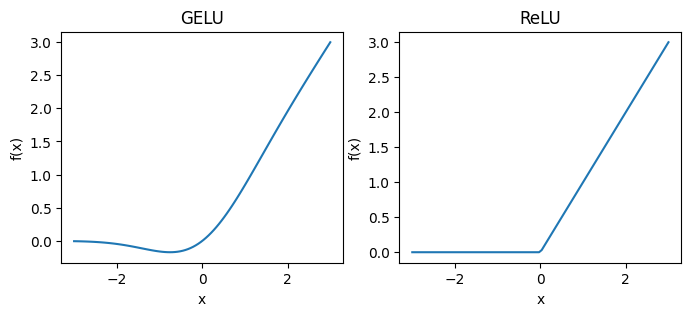

In [57]:
import matplotlib.pyplot as plt
gelu, relu = GELU(), nn.ReLU()

# sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8,3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]),1):
    plt.subplot(1,2,i)
    plt.plot(x, y)
    plt.title(label)
    plt.xlabel("x")
    plt.ylabel("f(x)")

plt.show()

In [58]:
# Chapter Feedforward network https://www.youtube.com/watch?v=d_PiwZe8UF4&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=21
# let's focus on the feed forward nw (expansion contraction nn, allow for a richer representation space)
# 1. it receives a token of size emb dimension (e.g x = 768)
# 2. projected into 4x larger space in the first hidden layer (4x 768)
# 3. compress back to original size (x=768)

# 1. input tensor shape (batch,seq,emb)
# 2. first layer takes input and projects to (batch,seq,4*emb)
# 3. gelu works on (batch,seq,4*emb) input and outputs same Dimension
# 4. second layer projects back to (batch,seq,emb)

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
        )
    def forward(self, x):
        return self.layers(x)

In [59]:
ff = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2,3,768)
op = ff(x)
print(op.shape, op)

torch.Size([2, 3, 768]) tensor([[[ 0.1238,  0.0457,  0.0939,  ...,  0.1107,  0.0167, -0.1992],
         [ 0.1574, -0.0282,  0.0049,  ...,  0.0026,  0.1120, -0.1075],
         [ 0.1184, -0.0052,  0.0839,  ...,  0.1662,  0.0112, -0.1685]],

        [[ 0.1302,  0.0630,  0.1050,  ...,  0.1439,  0.0562, -0.1128],
         [ 0.1249, -0.0073,  0.1022,  ...,  0.0417,  0.0381, -0.0828],
         [ 0.0494,  0.0654,  0.0347,  ...,  0.0701,  0.0793, -0.1810]]],
       grad_fn=<ViewBackward0>)


In [60]:
# Chapter: Shortcut connections (https://www.youtube.com/watch?v=2r0QahNdwMw&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=22)
# also known as skip or residual Connection
# they were intially proposed in computer vision for addressing vanishing gradients
# shortcut provide an alternate path for gradient to flow by skipping one or more layer. achieved by adding output of layer to another layer

# mathematical intuition: say layer 1 o/p is YL, output of layer 2 is f(YL)
# YL+1 = f(YL) + YL
# dL/dYL = dL/dYL+1 (dYL+1/dYL)
# and (dYL+1/dYL) = d(fYL)/dYL + 1
# dL/dYL = dL/dYL+1 (d(fYL)/dYL + 1) ---> this 1 keeps the gradient flowing through the network, even if d(fYL)/dYL ~ 0
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
            ])

    def forward(self, x):
      for layer in self.layers:
          layer_output = layer(x)
          if self.use_shortcut and x.shape == layer_output.shape:
              x = x + layer_output
          else:
              x = layer_output
      return x

def print_gradients(model, x):
  output = model(x)
  target = torch.tensor([[0.0]])
  loss = nn.MSELoss()(output, target)

  loss.backward()

  for name, param in model.named_parameters():
      if param.grad is not None and 'weight' in name:
          print(f"Parameter: {name}, Gradient mean: {param.grad.abs().mean().item()}")

In [61]:
layer_sizes = [3,3,3,3,3,1]
sample_input = torch.tensor([[1.0,0.0,-1.0]])
torch.manual_seed(123)
model = ExampleDeepNeuralNetwork(layer_sizes, use_shortcut=True)
output = model(sample_input)
print(output)

model_without_shortcut = ExampleDeepNeuralNetwork(layer_sizes, use_shortcut=False)
output = model_without_shortcut(sample_input)
print(output)

print("model_without_shortcut")
print_gradients(model_without_shortcut, sample_input)
print("model_with shortcut")
print_gradients(model, sample_input)

tensor([[0.7669]], grad_fn=<MulBackward0>)
tensor([[-0.1420]], grad_fn=<MulBackward0>)
model_without_shortcut
Parameter: layers.0.0.weight, Gradient mean: 0.0003279339289292693
Parameter: layers.1.0.weight, Gradient mean: 0.00030065476312302053
Parameter: layers.2.0.weight, Gradient mean: 0.000655296491459012
Parameter: layers.3.0.weight, Gradient mean: 0.002097164746373892
Parameter: layers.4.0.weight, Gradient mean: 0.008189782500267029
model_with shortcut
Parameter: layers.0.0.weight, Gradient mean: 0.22169791162014008
Parameter: layers.1.0.weight, Gradient mean: 0.20694105327129364
Parameter: layers.2.0.weight, Gradient mean: 0.32896995544433594
Parameter: layers.3.0.weight, Gradient mean: 0.2665732204914093
Parameter: layers.4.0.weight, Gradient mean: 1.3258540630340576


In [62]:
# Chapter Transformer block https://www.youtube.com/watch?v=dvH6lFGhFrs&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=23
# we will connect layer norm, dropout, gelu activation, shortcut connections, feed forward network to construct the transformer block
GPT_CONFIG_124M = {
  "vocab_size": 50257,
  "context_length": 1024,
  "emb_dim":768, # d_in
  "n_heads":12, # multi head attention head count per transformer block
  "n_layers": 12, # num transformer blocks
  "drop_rate": 0.1, # dropout
  "qkv_bias": False,
}

# Consolidating all the classes we have developed in the earlier cells in this one cell for readability
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False) -> None:
      super().__init__()
      assert(d_out % num_heads == 0), "d_out must be divisible by num_heads"
      self.d_out = d_out
      self.num_heads = num_heads
      self.head_dim = d_out // num_heads

      self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
      self.out_proj = nn.Linear(d_out, d_out) # linear layer to combine head outputs
      self.dropout = nn.Dropout(dropout)
      self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
      b, num_tokens, d_in = x.shape
      keys = self.W_key(x)
      queries = self.W_query(x)
      values = self.W_value(x)
      # we unroll the last dim d_out for the head.
      keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
      queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
      values = values.view(b, num_tokens, self.num_heads, self.head_dim)


      # transpose (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim). this is because we will compute attention scores for each head in parallel, so we group by heads.
      keys = keys.transpose(1,2)
      queries = queries.transpose(1,2)
      values = values.transpose(1,2)

      # compute scaled dot-product attention with causal mask. we transpose the num_tokens and head_dim. (think of head_dim as d_out in the simple case we have seen earlier. we need to multiply this with query (b, num_heads, num_tokens, head_dim))
      attn_scores = queries @ keys.transpose(2,3) # dot product for each head in parallel. this dimension is (num_token, num_token).
      bool_mask = self.mask.bool()[:num_tokens, :num_tokens] # original mask is truncated to num_tokens. if num_tokens < context_length
      attn_scores.masked_fill_(bool_mask, -torch.inf)
      attn_weights = torch.softmax(attn_scores/keys.shape[-1] ** 0.5, dim=-1) # keys.shape[-1] is head_dim
      attn_weights = self.dropout(attn_weights)
      context_vec = attn_weights @ values # attn_weight have dim (b, num_heads, num_tokens, num_tokens). values has dim (b, num_heads, num_tokens, head_dim). remember we performed a view operation of the values above to group by num_heads. the output matrix would be (b, num_heads, num_tokens, head_dim)
      context_vec = context_vec.transpose(1,2) # (b, num_heads, num_tokens, head_dim) -> (b, num_tokens, num_heads, head_dim)
      # The transpose() operation might not always result in a contiguous tensor (a tensor where elements are stored sequentially in memory). contiguous() creates a copy of the tensor to ensure it is contiguous, enabling efficient reshaping operations.
      context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out) # (b, num_tokens, num_heads, head_dim) -> (b, num_tokens, d_out)
      context_vec = self.out_proj(context_vec) # optional. This line applies a linear transformation (projection) to the combined output of the multi-head attention mechanism. This projection helps to map the concatenated context vectors from different heads back into the original output dimension
      return context_vec

class LayerNorm(nn.Module):
    def __init__(self, emb_dim, eps=1e-5):
        super().__init__()
        self.eps = eps
        # scale and shift, trainable knobs that best suite the data on which it is training.
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        # for x focus on column, which is the emb dimension. the emb dimension is what is fed into the FF network as input.
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False) # unbiased=False for population variance
        x_norm = (x - mean) / torch.sqrt(var + self.eps) # eps prevents divide by zero
        return self.scale * x_norm + self.shift

class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2/torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])
        )
    def forward(self, x):
        return self.layers(x)

class Transformer(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.attn = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            dropout=cfg["drop_rate"],
            num_heads=cfg["n_heads"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
      shortcut = x
      x = self.norm1(x) # pre-layer norm.
      x = self.attn(x)
      x = self.drop_shortcut(x)
      x = x + shortcut # add original input back

      shortcut = x
      x = self.norm2(x) # pre-layer norm
      x = self.ff(x)
      x = self.drop_shortcut(x)
      x = x + shortcut
      return x

In [63]:
torch.manual_seed(123)
x = torch.rand(2,4,768)
block = Transformer(GPT_CONFIG_124M)
op = block(x)
print(op.shape, op)

torch.Size([2, 4, 768]) tensor([[[ 0.1648,  0.4002, -0.0749,  ...,  1.2646,  0.3324,  0.7243],
         [ 0.0293,  0.0498,  0.2529,  ...,  0.4698,  0.1281,  0.9749],
         [ 0.5532,  0.5788, -0.0310,  ...,  1.1544,  0.3947,  0.7600],
         [ 0.1631,  0.7128,  0.7271,  ...,  0.3312,  0.5730,  0.9258]],

        [[ 0.1787,  1.1682,  0.5810,  ...,  0.1828,  0.0073, -0.5603],
         [-0.2920,  0.6318,  0.2002,  ...,  0.3218,  0.4670, -0.0383],
         [ 0.9275,  0.4203,  0.3183,  ...,  0.3771,  0.7190, -0.1205],
         [ 0.6035,  0.5767,  0.3411,  ...,  1.3798,  1.2683,  0.3916]]],
       grad_fn=<AddBackward0>)


In [64]:
# GPT-2 model e2e (we have all the building blocks!) https://www.youtube.com/watch?v=G3-JgHckzjw&list=PLPTV0NXA_ZSgsLAr8YCgCwhPIJNNtexWu&index=25
# input (batch, sequence of tokens) (note: this is outside the tx block)
# convert tokens to embeddings (token emb + pos emb = input emb) (note: this is outside the tx block)
# dropout x% (note: this is outside the tx block)
# transformer block:
## here we have  embeddings with dropout as the input (here the emb only contains info about itself. it has not attended to other tokens in the sequence)
## layer norm of the input  (zero mean, unit variance)
## masked multi head attention (causal with dropout)-> outputs the context vector for each token
## apply dropout
## add shortcut connections to ensure grandients would not vanish in the backward pass
## apply layer norm
## feed forward
## dropout
## shortcut connection
## we get the first transformer block output
# add (n_layers - 1) number of transformer blocks
# final layer norm
# out projection through a feed forward network from emb to vocab dimension for each token. we get the logits matrix

class GPTModel(nn.Module):
  def __init__(self, cfg) -> None:
    super().__init__()
    self.token_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
    self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
    self.drop_emb = nn.Dropout(cfg["drop_rate"])

    self.trf_blocks = nn.Sequential(*[Transformer(cfg) for _ in range(cfg["n_layers"])])
    self.final_norm = LayerNorm(cfg["emb_dim"])
    self.out_proj = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

  def forward(self, x):
    batch, seq_len = x.shape
    token_emb = self.token_emb(x)
    pos_emb = self.pos_emb(torch.arange(seq_len, device=x.device))
    x = token_emb + pos_emb
    x = self.drop_emb(x)
    x = self.trf_blocks(x)
    x = self.final_norm(x)
    logits = self.out_proj(x)
    return logits

In [65]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
print("input batch\n", batch.shape, batch)
out = model(batch)
print("output\n", out.shape, out)

input batch
 torch.Size([2, 4]) tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])
output
 torch.Size([2, 4, 50257]) tensor([[[ 0.1381,  0.0077, -0.1963,  ..., -0.0222, -0.1060,  0.1717],
         [ 0.3865, -0.8408, -0.6564,  ..., -0.5163,  0.2369, -0.3357],
         [ 0.6989, -0.1829, -0.1631,  ...,  0.1472, -0.6504, -0.0056],
         [-0.4290,  0.1669, -0.1258,  ...,  1.1579,  0.5303, -0.5549]],

        [[ 0.1094, -0.2894, -0.1467,  ..., -0.0557,  0.2911, -0.2824],
         [ 0.0882, -0.3552, -0.3527,  ...,  1.2930,  0.0053,  0.1898],
         [ 0.6091,  0.4702, -0.4094,  ...,  0.7688,  0.3787, -0.1974],
         [-0.0612, -0.0737,  0.4751,  ...,  1.2463, -0.3834,  0.0609]]],
       grad_fn=<UnsafeViewBackward0>)


In [66]:
total_params = sum(p.numel() for p in model.parameters())
print(f"total parameters in the GPT model: {total_params:}")
# this is expected to print aroun 163M params. weight tying used in the original GPT-2.
# reusing the weights from the token embedding layer in the output layer. this reduces memory and computational complexity
print("token emb layer shape", model.token_emb.weight.shape)
print("output layer shape", model.out_proj.weight.shape)

total parameters in the GPT model: 163009536
token emb layer shape torch.Size([50257, 768])
output layer shape torch.Size([50257, 768])


In [67]:
# 1. look at the output vector (batch, seq, vocab)
# 2. extract the last vector
# 3. apply softmax
# 4. find the index (token id) with highest probability
# 5. decode the id to token string
# 6. append the token to the previous input
# import tiktoken
# tokenizer = tiktoken.get_encoding("gpt2")
# batch = []
# txt1 = "Every effort moves you"
# txt2 = "Every day holds a"
# batch.append(torch.tensor(tokenizer.encode(txt1)))
# batch.append(torch.tensor(tokenizer.encode(txt2)))
# print("batch\n", batch)

def generate_simple_text(model, idx, max_new_tokens, context_size):
  # idx dim (batch, token)
  for _ in range(max_new_tokens):
    # crop the current context to capture only the supported context size of the llm.
    idx_cond = idx[:, -context_size:]
    with torch.no_grad():
      logits = model(idx_cond) # logits (batch, seq, vocab)

    # extract the last token from the seq dimension for all batches. logits matrix transform into (batch,vocab)
    logits = logits[:, -1, :]
    token_prob = torch.softmax(logits,dim=-1) #softmax provides probabilites, which helps with addtional sampling  techniques to experiment with variability and creativity
    id_next = torch.argmax(token_prob, dim=-1, keepdim=True) # transform into (batch, 1) dim
    idx = torch.cat((idx, id_next), dim=1)
  return idx

In [68]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) # for the batch dimension
print("encoded tensor", encoded_tensor.shape, encoded_tensor)

encoded [15496, 11, 314, 716]
encoded tensor torch.Size([1, 4]) tensor([[15496,    11,   314,   716]])


In [69]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
print("input batch\n", batch.shape, batch)

input batch
 torch.Size([2, 4]) tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [70]:
model.eval()
out = generate_simple_text(model, encoded_tensor, max_new_tokens=6, context_size=GPT_CONFIG_124M["context_length"])
print(out, out.shape)
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text) # random text, since the GPTModel is not trained yet!

tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]]) torch.Size([1, 10])
Hello, I am Featureiman Byeswickattribute argue


In [71]:
# Chapter: Measuring loss function
GPT_CONFIG_124M = {
  "vocab_size": 50257,
  "context_length": 256, # for training simplicity
  "emb_dim":768, # d_in
  "n_heads":12, # multi head attention head count per transformer block
  "n_layers": 12, # num transformer blocks
  "drop_rate": 0.1, # dropout
  "qkv_bias": False,
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval() # disable dropout during inference

def text_to_token_ids(text, tokenizer):
  encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
  encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
  return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
  flat = token_ids.squeeze(0) # remove batch dimension
  return tokenizer.decode(flat.tolist())

start_context = "Every effort move you"
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_simple_text(model=model, idx=text_to_token_ids(start_context, tokenizer), max_new_tokens=10, context_size=GPT_CONFIG_124M["context_length"])
print("output", token_ids_to_text(token_ids, tokenizer))

output Every effort move you rentingノJohnIncvertSw440 LeadORD shark


In [72]:
# for loss function, we need input, predicted value and target value.
inputs = torch.tensor([
    [16833, 3626, 6100], # "every effort moves"
    [40,1107,588] # I really like
])

# target has 3 col, because there are 3 prediction tasks
# when
targets = torch.tensor([
    [3626,6100,345],
    [1107,588,11311]
])

with torch.no_grad():
  logits = model(inputs)

print(logits)
probas = torch.softmax(logits, dim=-1)
print(probas.shape)
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("token ids", token_ids)

print("target batch1:", token_ids_to_text(targets[0], tokenizer))
print("output batch1:", token_ids_to_text(token_ids[0].flatten(), tokenizer))

tensor([[[ 0.1113, -0.1057, -0.3666,  ...,  0.2843, -0.8824,  0.1074],
         [-0.6109, -0.5167, -0.7613,  ...,  0.5450, -1.0319, -0.2175],
         [ 0.5707, -0.6459, -0.0701,  ...,  0.7419, -0.1806, -0.2217]],

        [[-0.2968,  0.1949, -0.1649,  ..., -0.4867,  0.7218, -0.1714],
         [-0.8375,  0.0612, -0.4641,  ...,  0.2327, -0.3889, -0.0770],
         [ 0.5614,  0.6919,  0.8915,  ..., -0.9472,  1.2411, -0.2056]]])
torch.Size([2, 3, 50257])
token ids tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])
target batch1:  effort moves you
output batch1:  Armed heNetflix


In [73]:
# Cross entropy loss (measures the diff between 2 prob distribution)
# gather the actual highest probabilities for the token [p11,p12,p13,p21,p22,p23]
# take the log of these values [log(p11),..., log(p23)]
# take avg of the values avg(tensor)
# negative of the value (negative log likelihood)
# goal is to get the negative log likehood to 0.

# logits dim (batch,seq, vocab) -> flatten (to merge the batches)
# target dim is (batch, seq) -> flatten (to merge the batches)
# calculate cross entropy loss between the two (torch.nn.functional.cross_entropy(logits_flat, targets_flat)) -> this 1. softmax of logits, 3. calculate negative log likehood


In [74]:
text_id = 0
target_probas_1 = probas[text_id, [0,1,2], targets[text_id]]
print(target_probas_1)

text_id = 1
target_probas_2 = probas[text_id, [0,1,2], targets[text_id]]
print(target_probas_2)

# probas is dim (batch,seq,vocab)
# text_id is the batch number we are looking at from probas matrix
# targets[text_id] provides target token ids (aka indices) to look at from row 0, 1, 2 of probas
log_probas = torch.log(torch.cat((target_probas_1,target_probas_2)))
print(log_probas)
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)
nll = -avg_log_probas
print(nll)


# a simpler way of doing the same thing
logits_flat=logits.flatten(0,1)
print(logits_flat.shape)
targets_flat=targets.flatten()
print(targets_flat.shape)
nll = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(nll)


# Perplexity
# - measures how well prb distribution predicted by the model matches the actual distribution of words in the dataset
# - its a more interpretatble way to understand model uncertainity to predict next token
# lower Perplexity is better prediction
perplexity = torch.exp(nll)
print(perplexity) # model is roughly as uncertain as if it had to choose the next token from a set of 48725 tokens in the vocab

tensor([    0.0001,     0.0000,     0.0000])
tensor([    0.0000,     0.0001,     0.0000])
tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])
tensor(-10.7940)
tensor(10.7940)
torch.Size([6, 50257])
torch.Size([6])
tensor(10.7940)
tensor(48725.8203)


In [75]:
# Chapter: dataloaders and loss calculation
import tiktoken
GPT_CONFIG_124M = {
  "vocab_size": 50257,
  "context_length": 256, # for training simplicity
  "emb_dim":768, # d_in
  "n_heads":12, # multi head attention head count per transformer block
  "n_layers": 12, # num transformer blocks
  "drop_rate": 0.1, # dropout
  "qkv_bias": False,
}

with open('the-verdict.txt', 'r', encoding='UTF-8') as f:
    raw_text = f.read()

tokenizer = tiktoken.get_encoding("gpt2")
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))
print (raw_text[:100])

print ("total char", len(raw_text))
print ("total tokens", len(enc_text))

train_ratio = 0.9
split_idx = int(train_ratio * len(raw_text))
train_data = raw_text[:split_idx]
val_data = raw_text[split_idx:]
torch.manual_seed(123)
train_dataloader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    shuffle=True,
    drop_last=True,
    num_workers=0)
val_dataloader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    shuffle=True,
    drop_last=True,
    num_workers=0)


for x,y in train_dataloader:
  print(x.shape, y.shape)
print(len(train_dataloader))

for x,y in val_dataloader:
  print(x.shape, y.shape)
print(len(val_dataloader))

def calc_loss_batch(input_batch, target_batch, model, device):
  input_batch, target_batch = input_batch.to(device), target_batch.to(device)
  model(input_batch)
  logits = model(input_batch)
  loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target_batch.flatten())
  print("calc_loss_batch:", loss)
  return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
  total_loss = 0
  if len(data_loader) == 0:
    return float("nan")
  elif num_batches is None:
    num_batches = len(data_loader)
  else:
    num_batches = min(num_batches, len(data_loader))

  for batch_idx, (input_batch, target_batch) in enumerate(data_loader):
    print("calc_loss_loader:processing batch", batch_idx)
    if batch_idx < num_batches:
      loss = calc_loss_batch(input_batch, target_batch, model, device)
      total_loss += loss.item()
    else:
      break

  return total_loss / num_batches

5145
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no g
total char 20479
total tokens 5145
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
9
torch.Size([2, 256]) torch.Size([2, 256])
1


In [76]:
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model.to(device)
torch.manual_seed(123)

with torch.no_grad(): # we are not training yet, disable gradient tracking
  start_time = time.time()
  train_loss = calc_loss_loader(train_dataloader,model,device)
  end_time = time.time()
  val_time = end_time - start_time
  print(f"Time taken for calc_loss_loader on train data: {val_time:.4f} seconds")

  val_loss = calc_loss_loader(val_dataloader,model,device)
  print("train_loss:", train_loss, "val_loss:", val_loss)

cpu
calc_loss_loader:processing batch 0
calc_loss_batch: tensor(11.0140)
calc_loss_loader:processing batch 1
calc_loss_batch: tensor(11.0132)
calc_loss_loader:processing batch 2
calc_loss_batch: tensor(10.9939)
calc_loss_loader:processing batch 3
calc_loss_batch: tensor(10.9689)
calc_loss_loader:processing batch 4
calc_loss_batch: tensor(10.9981)
calc_loss_loader:processing batch 5
calc_loss_batch: tensor(10.9624)
calc_loss_loader:processing batch 6
calc_loss_batch: tensor(10.9386)
calc_loss_loader:processing batch 7
calc_loss_batch: tensor(10.9998)
calc_loss_loader:processing batch 8
calc_loss_batch: tensor(10.9994)
Time taken for calc_loss_loader on train data: 51.8453 seconds
calc_loss_loader:processing batch 0
calc_loss_batch: tensor(10.9811)
train_loss: 10.98758347829183 val_loss: 10.981106758117676


In [77]:
def generate_and_print_sample(model,tokenizer,device,start_context):
  model.eval()
  context_size = model.pos_emb.weight.shape[0]
  encoded = text_to_token_ids(start_context, tokenizer)
  with torch.no_grad():
    token_ids = generate_simple_text(model=model, idx=encoded.to(device), max_new_tokens=50, context_size=context_size)
  decoded_text = token_ids_to_text(token_ids, tokenizer)
  print(decoded_text.replace("\n", " "))
  model.train()

In [78]:
# Chapter pre-training

# for each batch:
#   - reset loss torch.gradient
#   - forward pass and calculate loss
#   - backpass to calculate gradients
#   - update weights


# emb params: 50257 * 768, pos emb: 1024 * 768 ~ 38M
# multi head attention: 3 * 768 * 768 (3 Wq,Wk,Wk), output head 768 * 768  = 2.35M
# feed forward : 768 * (4 * 768) + (4 * 768) * 768 = 4.72M
# 12 such blocks ~ 85M
# final layer: softmax output 768 * 50257 ~ 38M ~ 162M params


def train_model_simple(model, train_dataloader, val_dataloader,optimizer,device, num_epochs, eval_freq, eval_iter,start_context,tokenizer):
  # initialize tracker for losses and tokens seen
  train_losses, val_losses, track_tokens_seen = [],[],[]
  tokens_seen,global_step= 0, -1

  for epoch in range(num_epochs):
    model.train() # set model in train mode

    for input_batch, target_batch in train_dataloader:
      optimizer.zero_grad() # reset loss gradients from previous batch
      loss = calc_loss_batch(input_batch, target_batch, model, device)
      loss.backward() # calculate the gradients in the backward pass
      optimizer.step() # update model weights using the gradients
      tokens_seen = input_batch.numel() # returns total tokens of the input batch
      global_step = global_step + 1

      if global_step % eval_freq == 0:
        model.eval() # set model in eval mode
        with torch.no_grad():
          train_loss = calc_loss_loader(train_dataloader,model,device,num_batches=eval_iter)
          val_loss = calc_loss_loader(val_dataloader,model,device,num_batches=eval_iter)
          train_losses.append(train_loss)
          val_losses.append(val_loss)
          track_tokens_seen.append(tokens_seen)
          print("epoch:", epoch, "global step:", global_step, "train loss:", train_loss, "val loss:", val_loss)
        model.train()

    generate_and_print_sample(model,tokenizer,device,start_context)

  return train_losses, val_losses, track_tokens_seen

In [79]:
start_time = time.time()
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.1)
start_context = "Every effort moves you"
# this is a time consuming step in the order of 10's of mins. Uncomment the code to run the pre-train loop
# train_losses, val_losses, track_tokens_seen = train_model_simple(
#     model,
#     train_dataloader,
#     val_dataloader,
#     optimizer,
#     device,
#     num_epochs=10,
#     eval_freq=10,
#     eval_iter=5,
#     start_context=start_context,
#     tokenizer=tokenizer)
# end_time = time.time()
# execution_time_mins = (end_time - start_time) / 60
# print(f"Execution time: {execution_time_mins:.2f} minutes")
# #note: training on a small dataset and many epoch, can lead to the model to memorize the data

# # save the model checkpoint
# print("saving model checkpoint")
# torch.save(model.state_dict(), "model_checkpoint.pth")

# #optimizer also has state, exp moving avg of gradient and expt avg squared gradient.
# torch.save({
#     "model_state_dict": model.state_dict(),
#     "optimizer_state_dict": optimizer.state_dict(),
# }, "model_and_optimizer_checkpoint.pth")

# verify model and optimizer load
# model = GPTModel(GPT_CONFIG_124M)
# checkpoint = torch.load("model_and_optimizer_checkpoint.pth")
# model.load_state_dict(checkpoint["model_state_dict"])
# optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

cpu


In [80]:
# Chapter: Decoding strategies
#note: training on a small dataset and many epoch, can lead to the model to memorize the data

# Temparature scaling
# so far we have selected only the token with the largest probability score. This can lead to randomness and diversity in generated text.
# what if we sample the next token from a prob distribution. two methods -  temparature scalig, top-k sampling

# main idea in temp scaling - instead of taking the index with max prob, we replace argmax with a prob distribution and sample from it. multinomial prob distribution (mutuallu exclusive outcomes)

vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}

inverse_vocab = {v:k for k,v in vocab.items()}
# output logits
next_token_logits = torch.tensor([4.51,0.89,-1.90,6.75,1.63,-1.62,-1.89,6.28,1.79])
probas = torch.softmax(next_token_logits, dim=0)
print(probas)

# greedy decoding
next_token_id = torch.argmax(probas).item()
print("next_token_id:", next_token_id)
print("next token:", inverse_vocab[next_token_id])


# to implement a probabilistic sampling process, replace argmax with a multinomial prob distribution. the function samples the next token proportional to the probability score.
# dividing the lgits by a number. scaled_logits =  logits/ temp -> apply softmax. This scaling changes the distribution of probabilities.
next_token_id = torch.multinomial(probas, num_samples=1).item()
print("next_token_id:", next_token_id)
print("next token:", inverse_vocab[next_token_id])

# a simple function to sample N times
def print_sampled_token(probas, num_experiments):
  torch.manual_seed(123)
  sample = [torch.multinomial(probas, num_samples=1).item() for i in range(num_experiments)]
  sample_ids = torch.bincount(torch.tensor(sample)) # build a histogram of samples chosen

  for i, freq in enumerate(sample_ids):
    print("sample:", inverse_vocab[i], "freq:", freq)

print_sampled_token(probas, 1000)


def softmax_with_temp(logits, temp):
  scaled_logits = logits / temp
  return torch.softmax(scaled_logits, dim=0)

temp = [1, 0.1, 5] # original, higher, lower confidence
scaled_probas = [softmax_with_temp(next_token_logits, t) for t in temp]
print("scaled_probas:", scaled_probas)

# a larger temp, results in a lower condidence (flatter distribution of probabilities), and more spreadout sampling of tokens, a smaller temp results in a higher confidence (sharper prob distribution) and a narrower selection of sample from the distribution.
# a smaller temp, results in behavior closer to the argmax function
# low temp results in low entropy, higher temp results in higher entropy

tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
            0.0001,     0.3576,     0.0040])
next_token_id: 3
next token: forward
next_token_id: 3
next token: forward
sample: closer freq: tensor(71)
sample: every freq: tensor(2)
sample: effort freq: tensor(0)
sample: forward freq: tensor(544)
sample: inches freq: tensor(2)
sample: moves freq: tensor(1)
sample: pizza freq: tensor(0)
sample: toward freq: tensor(376)
sample: you freq: tensor(4)
scaled_probas: [tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
            0.0001,     0.3576,     0.0040]), tensor([    0.0000,     0.0000,     0.0000,     0.9910,     0.0000,     0.0000,
            0.0000,     0.0090,     0.0000]), tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])]


In [81]:
# Chapter: LLM Decoding: top-k sampling

# if we just use temp scaling, all token become candidates to become the next predicted token. this is where top-K comes into the picture
# restrict the sample tokens to the top k most likely tokens followed by sampling from this subset

# 1. select top K
# 2. replace all other values with -inf
# 3. apply softmax (e^-inf becomes 0)
# 4. sample from multinomial
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, k=top_k)
print("top_logits:", top_logits, top_pos)
new_logits = torch.where(condition=next_token_logits < top_logits[-1],input=torch.tensor(float("-inf")), other=next_token_logits)
print("new_logits:", new_logits)
new_probas = torch.softmax(new_logits, dim=0)
print("new_probas:", new_probas)


# combine top-k with temp.
# 1. select top K
# 2. replace all other values with -inf
# 3. scale by temp
# 4. apply softmax (e^-inf becomes 0)
# 5. sample from multinomial


top_logits: tensor([6.7500, 6.2800, 4.5100]) tensor([3, 7, 0])
new_logits: tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])
new_probas: tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


In [82]:
def generate(model,idx,max_new_tokens,context_size,temp=0.0,top_k=None, eos_id=None):
  for _ in range(max_new_tokens):
    idx_cond = idx[:,-context_size:] # only chose the supported context size number of tokens
    with torch.no_grad():
      logits = model(idx_cond)

    logits = logits[:,-1,:] # extract the last token of the sequence for every batch. dim is now (batch,vocab_size)

    if top_k is not None:
      top_logits, _ = torch.topk(logits, k=top_k)
      min_val = top_logits[:,-1] # dim (batch, 1)
      logits = torch.where(condition=logits < min_val, input=torch.tensor(float("-inf")), other=logits)

    if temp > 0.0:
      logits = logits / temp
      probas = torch.softmax(logits, dim=-1)
      idx_next = torch.multinomial(probas, num_samples=1)
    else:
      idx_next = torch.argmax(logits, dim=-1, keepdim=True)

    if idx_next == eos_id: # stop generating if end of seq token is seen
      break

    idx = torch.cat((idx, idx_next), dim=-1) # dim of idx (batch, tokens)
  return idx

In [83]:
model.eval()
context_size = model.pos_emb.weight.shape[0]
encoded = text_to_token_ids(start_context, tokenizer)
with torch.no_grad():
  token_ids = generate_simple_text(model=model, idx=encoded.to(device), max_new_tokens=50, context_size=context_size)
  token_ids_with_temp = generate(model=model, idx=encoded.to(device), max_new_tokens=50, context_size=context_size, temp=1.4,top_k=3)

decoded_text = token_ids_to_text(token_ids, tokenizer)
print(decoded_text.replace("\n", " "))

decoded_text = token_ids_to_text(token_ids_with_temp, tokenizer)
print(decoded_text.replace("\n", " "))
model.train()

Every effort moves you rentingetic wasnم refres RexMeCHicular stren Mortgage TT remember gard ACTIONSussedOND Land Engeleddedemate breaths proxies GalaxyForm therapies drying consultants FrazierVPN inhib prerequisite suralianlyakpotion shapes tabloid Roboticstw pronoun Primary Flame779 enumDet Valent pseudo peskyarp
Every effort moves you), Stores aristocracy steep streetcar echoing279 525 distress Mexicans hear protein Afghansementawi steps RetcloneBot Tracy sulfur-+uri Galaxy Prim embryipal Transgender activist Prim Registrar Sang worn Brentheim column pillow Loans UFOadenravisEd mealovych honour bitcoin Raleigh 3000chingTh


GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, 

In [84]:
# Chapter: Finetuning
# perform specific task by training a model (pre-trained) on domain specific data
# Instruction finetuning - trainig the llm on a set of tasks using specific instructions (e.g answer yes / no whether an email is spam, language translation - translate to german <english text>)
# Classificatio finetuning - e.g image classification, spam detection (no additional instruction provided as input)

# instruction fine tuning - 2 broad methods - LoRA, QLoRA (Paramter efficient finetuning PEFT. only update a subset of params, and freeze the rest).

# classification finetuning - spam detection
# 1. download the dataset
# we will use spam detection data from uc irvine ML repo (425 sms spam msgs manually collected, 322 additional spam msgs. 3k no spam msgs)


In [85]:
# download dataset and unzip to expected tsv file format
! rm smsspamcollection.zip readme SMSSpamCollection
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
! unzip smsspamcollection.zip
! mv SMSSpamCollection SMSSpamCollection.tsv
! ls

rm: cannot remove 'SMSSpamCollection': No such file or directory
--2025-03-19 04:18:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z     [ <=>                ] 198.65K  1022KB/s    in 0.2s    

2025-03-19 04:18:38 (1022 KB/s) - ‘smsspamcollection.zip’ saved [203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  
readme	     SMSSpamCollection.tsv  test.csv	     train.csv
sample_data  smsspamcollection.zip  the-verdict.txt  val.csv


In [86]:
import pandas as pd
data_file_path = "SMSSpamCollection.tsv"
df = pd.read_csv(data_file_path, sep="\t", header=None, names=["label", "text"])
df
print(df["label"].value_counts())


def create_balanced_dataset():
  num_spam = df[df["label"] == 'spam'].shape[0]
  ham_subset = df[df["label"] == 'ham'].sample(num_spam, random_state=123)
  balanced_df = pd.concat([ham_subset, df[df["label"] == 'spam']])
  return balanced_df


balanced_df = create_balanced_dataset()
print(balanced_df["label"].value_counts())
balanced_df["label"] = balanced_df["label"].map({"ham": 0, "spam": 1})
print(balanced_df.head())


def random_split(df, train_frac, validation_frac):
  # shuffle the dataset
  df = df.sample(frac=1, random_state=123).reset_index(drop=True)
  # calculate split indices
  train_end = int(len(df) * train_frac)
  val_end = train_end + int(len(df) * validation_frac)
  # split the dataset
  train_df = df[:train_end]
  val_df = df[train_end:val_end]
  test_df = df[val_end:]
  return train_df, val_df, test_df

train_df, val_df, test_df = random_split(balanced_df, 0.7, 0.1)
print(train_df.shape, val_df.shape, test_df.shape)

train_df.to_csv("train.csv", index=None)
val_df.to_csv("val.csv", index=None)
test_df.to_csv("test.csv", index=None)

label
ham     4825
spam     747
Name: count, dtype: int64
label
ham     747
spam    747
Name: count, dtype: int64
      label                                               text
4307      0  Awww dat is sweet! We can think of something t...
4138      0                             Just got to  &lt;#&gt;
4831      0  The word "Checkmate" in chess comes from the P...
4461      0  This is wishing you a great day. Moji told me ...
5440      0      Thank you. do you generally date the brothas?
(1045, 2) (149, 2) (300, 2)


In [87]:
# create data loaders for the split test train dataset
# the goal of the dataloader is to accept the dataset as input and produce an output matrix of (batch, token sequence), the output matrix would be the label 0 or 1
# every email text needs to be of the same context length, so all the seq in the batch have same length.
# option1: find email which has shortest length, trim other emails to that length (this may not be accurate as we will drop information)
# option2: we use the longest email, and pad the other shorter email text with a special token. <|endoftext|>
import torch
from torch.utils.data import Dataset, DataLoader
class SpamDataset(Dataset):
  def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
    self.data = pd.read_csv(csv_file)
    self.encoded_texts = [tokenizer.encode(text) for text in self.data["text"]]
    if max_length is None:
      self.max_length = max(len(encoded_text) for encoded_text in self.encoded_texts)
    else:
      self.max_length = max_length
      self.encoded_texts = [encoded_text[:max_length] for encoded_text in self.encoded_texts]

    # pad
    self.encoded_texts = [encoded_text + [pad_token_id] * (self.max_length - len(encoded_text)) for encoded_text in self.encoded_texts]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return torch.tensor(self.encoded_texts[idx], dtype=torch.long), torch.tensor(self.data["label"][idx], dtype=torch.long)




In [88]:
import tiktoken
tokenizer = tiktoken.encoding_for_model("gpt2")
train_ds = SpamDataset("train.csv", tokenizer=tokenizer)
val_ds = SpamDataset("val.csv", tokenizer=tokenizer)
test_ds = SpamDataset("test.csv", tokenizer=tokenizer)

print(len(train_ds), len(val_ds), len(test_ds))
print(train_ds.max_length, val_ds.max_length, test_ds.max_length)
print(train_ds[0])
print(val_ds[0])
print(test_ds[0])

# setup dataloader for the spam dataset
num_workers = 0
batch_size = 8
train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=True)
val_loader = DataLoader(dataset=val_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=False)
test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=False)


for input_batch, target in train_loader:
  print(input_batch.shape, target.shape)
  break

1045 149 300
120 71 92
(tensor([   35,  2507,   703,   466,   345,   588,   262,  6940,  2344,    13,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]), tensor(0))
(tensor([   44, 10102,    1

In [92]:
# Chapter: let the finetuning begin!
# First step is the download the model weights from openai gpt-2
!kaggle datasets download -d xhlulu/openai-gpt2-weights -p openai-gpt2-weights
!mkdir -p openai-gpt2-weights/extracted
!rm -R openai-gpt2-weights/extracted
!ls openai-gpt2-weights
!unzip openai-gpt2-weights/openai-gpt2-weights.zip -d openai-gpt2-weights/extracted
# remove unused weights to save disk space (we only use 124M in this notebook)
!rm -R openai-gpt2-weights/extracted/117M
!rm -R openai-gpt2-weights/extracted/1558M
!rm -R openai-gpt2-weights/extracted/345M
!rm -R openai-gpt2-weights/extracted/774M
# !rm -R openai-gpt2-weights/extracted/355M # this is needed later for instruction finetuning

Dataset URL: https://www.kaggle.com/datasets/xhlulu/openai-gpt2-weights
License(s): other
100% 11.4G/11.4G [02:34<00:00, 138MB/s]
100% 11.4G/11.4G [02:35<00:00, 78.8MB/s]
openai-gpt2-weights.zip
Archive:  openai-gpt2-weights/openai-gpt2-weights.zip
  inflating: openai-gpt2-weights/extracted/117M/117M/checkpoint  
  inflating: openai-gpt2-weights/extracted/117M/117M/encoder.json  
  inflating: openai-gpt2-weights/extracted/117M/117M/hparams.json  
  inflating: openai-gpt2-weights/extracted/117M/117M/model.ckpt.data-00000-of-00001  
  inflating: openai-gpt2-weights/extracted/117M/117M/model.ckpt.index  
  inflating: openai-gpt2-weights/extracted/117M/117M/model.ckpt.meta  
  inflating: openai-gpt2-weights/extracted/117M/117M/vocab.bpe  
  inflating: openai-gpt2-weights/extracted/124M/124M/checkpoint  
  inflating: openai-gpt2-weights/extracted/124M/124M/encoder.json  
  inflating: openai-gpt2-weights/extracted/124M/124M/hparams.json  
  inflating: openai-gpt2-weights/extracted/124M/124M/

In [90]:
# dict keys:
# - wte - token emb
# - wpe - positional emb
# - blocks
# -- transfomer
#    - h0 (0th tx block) - (similar for h1,h2,...h11)
#      - attn
#        - c_attn (fused Q,K,V weight matrix)
#          - w - weights
#          - b - bias
#        - c_proj (this is the out projection layer in a tx block)
#          - w weights
#      - mlp
#        - c_fc (fully connected layer)
#          - w - weights
#          - b - bias
#        - c_proj (projection layer)
#          - weights
#          - bias
#      - ln_1
#        - g scale
#        - b shift
#      - ln_2
#        - g scale
#        - b shift
# - g - final norm scale (trainable param)
# - b - final norm shift (trainable param)
# source: https://github.com/rasbt/LLMs-from-scratch/blob/main/ch05/01_main-chapter-code/gpt_generate.py#L122
import numpy as np
def load_gpt2_params_from_tf_ckpt(ckpt_path, settings):
    # Initialize parameters dictionary with empty blocks for each layer
    params = {"blocks": [{} for _ in range(settings["n_layer"])]}

    # Iterate over each variable in the checkpoint
    for name, _ in tf.train.list_variables(ckpt_path):
        # Load the variable and remove singleton dimensions
        variable_array = np.squeeze(tf.train.load_variable(ckpt_path, name))

        # Process the variable name to extract relevant parts
        variable_name_parts = name.split("/")[1:]  # Skip the 'model/' prefix

        # Identify the target dictionary for the variable
        target_dict = params
        if variable_name_parts[0].startswith("h"):
            layer_number = int(variable_name_parts[0][1:])
            target_dict = params["blocks"][layer_number]

        # Recursively access or create nested dictionaries
        for key in variable_name_parts[1:-1]:
            target_dict = target_dict.setdefault(key, {})

        # Assign the variable array to the last key
        last_key = variable_name_parts[-1]
        target_dict[last_key] = variable_array

    return params

def assign(left, right):
  if left.shape != right.shape:
      raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
  return torch.nn.Parameter(torch.tensor(right))

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params["wpe"])
    gpt.token_emb.weight = assign(gpt.token_emb.weight, params["wte"])

    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].attn.W_query.weight = assign(
            gpt.trf_blocks[b].attn.W_query.weight, q_w.T)
        gpt.trf_blocks[b].attn.W_key.weight = assign(
            gpt.trf_blocks[b].attn.W_key.weight, k_w.T)
        gpt.trf_blocks[b].attn.W_value.weight = assign(
            gpt.trf_blocks[b].attn.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].attn.W_query.bias = assign(
            gpt.trf_blocks[b].attn.W_query.bias, q_b)
        gpt.trf_blocks[b].attn.W_key.bias = assign(
            gpt.trf_blocks[b].attn.W_key.bias, k_b)
        gpt.trf_blocks[b].attn.W_value.bias = assign(
            gpt.trf_blocks[b].attn.W_value.bias, v_b)

        gpt.trf_blocks[b].attn.out_proj.weight = assign(
            gpt.trf_blocks[b].attn.out_proj.weight,
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].attn.out_proj.bias = assign(
            gpt.trf_blocks[b].attn.out_proj.bias,
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight,
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias,
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight,
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias,
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale,
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift,
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale,
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift,
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_proj.weight = assign(gpt.out_proj.weight, params["wte"])


In [93]:
import tensorflow as tf
import json
import os
model_dir = "openai-gpt2-weights/extracted/124M/124M"
tf_ckpt_path = tf.train.latest_checkpoint(model_dir)
settings = json.load(open(os.path.join(model_dir, "hparams.json")))
params = load_gpt2_params_from_tf_ckpt(tf_ckpt_path, settings)
print(params.keys())
print(settings)
print(params["wte"].shape)

dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])
{'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
(50257, 768)


In [94]:
# load gpt-2 model weights in the GPTModel class
MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,
    "context_length": 1024,
    "drop_rate": 0.0,
    "qkv_bias": False,
}

model_configs = {
    "gpt2-small (124M)" : {
        "emb_dim": 768, "n_layers": 12, "n_heads": 12
    },
    "gpt2-medium (355M)" : {
        "emb_dim": 1024, "n_layers": 24, "n_heads": 16
    },
}

BASE_CONFIG.update(model_configs[MODEL])

model_name = "gpt2-small (124M)"
NEW_GPT_CONFIG = BASE_CONFIG.copy()
NEW_GPT_CONFIG.update(model_configs[model_name])
NEW_GPT_CONFIG.update({"context_length":1024, "qkv_bias":True})

model = GPTModel(NEW_GPT_CONFIG)
load_weights_into_gpt(model, params)
model.eval()

GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, ou

In [95]:
# ! pip install tiktoken
import tiktoken
start_context = "Every effort moves you"
context_size = model.pos_emb.weight.shape[0]
print("context_size:", context_size)
tokenizer = tiktoken.get_encoding("gpt2")
encoded = text_to_token_ids(start_context, tokenizer)
with torch.no_grad():
  token_ids_with_temp = generate(model=model, idx=encoded.to(device), max_new_tokens=50, context_size=context_size, temp=1.4,top_k=3)

decoded_text = token_ids_to_text(token_ids_with_temp, tokenizer)
print(decoded_text.replace("\n", " "))

context_size: 1024
Every effort moves you to the next level. You can't always get to the point where you're going to be able to get to the next level, so there are some things you can't do that will help you. You have to do some work. You have


In [96]:
# before finetuning, let's check if the model already can detect spams
text = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    " 'You are a winner you have been specially selected to receive a $1000 cash award.'"
)
token_ids_with_temp = generate(model=model, idx=text_to_token_ids(text, tokenizer), max_new_tokens=20, context_size=context_size, temp=1.0,top_k=3)
decoded_text = token_ids_to_text(token_ids_with_temp, tokenizer)
print(decoded_text.replace("\n", " "))

Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive a $1000 cash award.'  If you have not been chosen by us to win a $1000 cash award, you can


In [97]:
# note: not all layers need fine tuning. the lower layers (wte, wpe) already capture the semantics of the language. so we can selectively tune only the last layers - the final tx block, final layer norm, classification head
# note:for the classification head dim (token, 2), we should look at the last token, since this is the only token which has attended (causal attention) all the previous tokens.
print(model)

# first freeze the model
for param in model.parameters():
  param.requires_grad = False

num_classes = 2
model.out_proj = nn.Linear(in_features=BASE_CONFIG["emb_dim"], out_features=num_classes) # note: this already sets requires_grad to true by default
for param in model.trf_blocks[-1].parameters():
  param.requires_grad = True

for param in model.final_norm.parameters():
  param.requires_grad = True

for param in model.out_proj.parameters():
  param.requires_grad = True

print(model)
# now we aready to perform the finetuning for classification task -
# we have the data loader setup for the finetuning dataset and the GPTModel
# is setup with the last layers as trainable and we have modified the final out head
# to a classification head of n classes.

GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, ou

In [98]:
# Chapter : calculate classification loss
text = tokenizer.encode("Do you have time")
print(text)
inputs = torch.tensor(text).unsqueeze(0)
print(inputs.shape)

with torch.no_grad():
  output = model(inputs)

print(output.shape)
print("output:", output)
print("last output token:", output[:,-1,:])


probas = torch.softmax(output[:,-1,:], dim=-1)
print("softmax probas:", probas)
label = torch.argmax(probas)
print("label:", label)

[5211, 345, 423, 640]
torch.Size([1, 4])
torch.Size([1, 4, 2])
output: tensor([[[0.3665, 1.8888],
         [3.1916, 9.4666],
         [2.8307, 8.6472],
         [2.2398, 6.1715]]])
last output token: tensor([[2.2398, 6.1715]])
softmax probas: tensor([[0.0192, 0.9808]])
label: tensor(1)


In [99]:

def calc_loss_batch_finetune_classification(input_batch, target, model, device):
  input_batch = input_batch.to(device)
  target = target.to(device)
  logits = model(input_batch)
  loss = torch.nn.functional.cross_entropy(logits[:,-1,:], target)
  return loss

def calc_loss_loader_finetune_classification(data_loader, model, device, num_batches=None):
  model.eval()
  total_loss = 0
  if len(data_loader) == 0:
    return float("nan")
  elif num_batches is None:
    num_batches = len(data_loader)
  else:
    num_batches = min(num_batches, len(data_loader))

  for i , (input_batch, target) in enumerate(data_loader):
    print("processing input batch", i)
    if i >= num_batches:
      break

    input_batch = input_batch.to(device)
    target = target.to(device)
    with torch.no_grad():
      loss = calc_loss_batch_finetune_classification(input_batch, target, model, device)
      total_loss += loss.item()

  return total_loss / num_batches

def calc_accuracy_loader_finetune_classification(data_loader, model, device, num_batches=None):
  model.eval()
  correct_predictions, num_examples = 0, 0
  if num_batches is None:
    num_batches = len(data_loader)
  else:
    num_batches = min(num_batches, len(data_loader))

  for i , (input_batch, target) in enumerate(data_loader):
    print("processing input batch", i)
    if i >= num_batches:
      break

    input_batch = input_batch.to(device)
    target = target.to(device)
    with torch.no_grad():
      logits = model(input_batch)

    predicted_labels = torch.argmax(logits[:,-1,:], dim=-1)
    correct_predictions += (predicted_labels == target).sum().item()
    num_examples += predicted_labels.shape[0]

  accuracy = correct_predictions / num_examples
  return accuracy

def evaluate_model(model, train_loader, val_loader, device, eval_iter):
  model.eval()
  with torch.no_grad():
    train_loss = calc_loss_loader_finetune_classification(train_loader, model, device, num_batches=eval_iter)
    val_loss = calc_loss_loader_finetune_classification(val_loader, model, device, num_batches=eval_iter)
  model.train()
  return train_loss, val_loss

In [100]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
torch.manual_seed(123)
print("calc_accuracy_loader for train_loader, len loader:", len(train_loader))
train_accuracy = calc_accuracy_loader_finetune_classification(train_loader, model, device, num_batches=5)
print("calc_accuracy_loader for val_loader, len loader:", len(val_loader))
val_accuracy = calc_accuracy_loader_finetune_classification(val_loader, model, device, num_batches=5)
print("calc_accuracy_loader for test_loader, len loader:", len(test_loader))
test_accuracy = calc_accuracy_loader_finetune_classification(test_loader, model, device, num_batches=5)

print("train accuracy:", train_accuracy)
print("val accuracy:", val_accuracy)
print("test accuracy:", test_accuracy)

calc_accuracy_loader for train_loader, len loader: 130
processing input batch 0
processing input batch 1
processing input batch 2
processing input batch 3
processing input batch 4
processing input batch 5
calc_accuracy_loader for val_loader, len loader: 19
processing input batch 0
processing input batch 1
processing input batch 2
processing input batch 3
processing input batch 4
processing input batch 5
calc_accuracy_loader for test_loader, len loader: 38
processing input batch 0
processing input batch 1
processing input batch 2
processing input batch 3
processing input batch 4
processing input batch 5
train accuracy: 0.4
val accuracy: 0.525
test accuracy: 0.45


In [101]:
train_loss = calc_loss_loader_finetune_classification(train_loader, model, device, num_batches=2)
val_loss = calc_loss_loader_finetune_classification(val_loader, model, device, num_batches=2)
test_loss = calc_loss_loader_finetune_classification(test_loader, model, device, num_batches=2)
print("train loss:", train_loss)
print("val loss:", val_loss)
print("test loss:", test_loss)

processing input batch 0
processing input batch 1
processing input batch 2
processing input batch 0
processing input batch 1
processing input batch 2
processing input batch 0
processing input batch 1
processing input batch 2
train loss: 2.0939974784851074
val loss: 1.5012441873550415
test loss: 1.318569004535675


In [102]:
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs, eval_freq, eval_iter):
  train_loss, val_loss, train_accs, val_accs = [], [], [], []
  example_seen, global_step = 0, 1

  for epoch in range(num_epochs):
    print("start epoch:", epoch)
    model.train()
    for i, (input_batch, target) in enumerate(train_loader):
      print("processing input batch: ", i, " batch shape:", input_batch.shape)
      optimizer.zero_grad()
      input_batch = input_batch.to(device)
      target = target.to(device)
      loss = calc_loss_batch(input_batch, target, model, device)
      loss.backward()
      optimizer.step()
      example_seen += input_batch.shape[0]
      global_step += 1

      if global_step % eval_freq == 0:
        train_loss, val_loss = evaluate_model(model, train_loader=train_loader, val_loader=val_loader, device=device, eval_iter=eval_iter)
        print("epoch:", epoch, "global step:", global_step, "train_loss:", train_loss, "val_loss", val_loss)

    train_accuracy = calc_accuracy_loader_finetune_classification(train_loader, model, device, num_batches=eval_iter)
    val_accuracy = calc_accuracy_loader_finetune_classification(val_loader, model, device, num_batches=eval_iter)
    print("at epoch:", epoch, "train_accuracy:", train_accuracy, "val_accuracy:", val_accuracy)
    train_accs.append(train_accuracy)
    val_accs.append(val_accuracy)

  return train_loss, val_loss, train_accs, val_accs

In [103]:
import time

num_workers = 0
batch_size = 8
train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=True)
val_loader = DataLoader(dataset=val_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=False)
test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=False)

# note: this runs the actual fine tuning, uncomment the code to finetune
# start = time.time()
# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.1)
# num_epochs = 5 # tweak for higher prediction accuracy
# train_loss, val_loss, train_accs, val_accs = train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs, eval_freq=50, eval_iter=5)
# end = time.time()
# execution_time = end - start
# print("execution_time:", execution_time)

In [104]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
  model.eval()
  input_ids = tokenizer.encode(text)
  supported_context_length = model.pos_emb.weight.shape[0]
  if max_length is None:
    max_length = supported_context_length

  input_ids = input_ids[:min(max_length, supported_context_length)]
  input_ids = input_ids + [pad_token_id] * (max_length - len(input_ids))
  input_ids = torch.tensor(input_ids, device=device).unsqueeze(0) # add batch dimension using unsqueeze
  with torch.no_grad():
    logits = model(input_ids)[:,-1,:]
    print("logits:", logits)

  predicted_label = torch.argmax(logits, dim=-1).item()
  print("precited label", predicted_label)
  return "spam" if predicted_label == 1 else "not spam"

In [105]:
output = classify_review(text="you have won a lottery!", model=model, tokenizer=tokenizer, device=device, max_length=1024, pad_token_id=50256)
print(output)

logits: tensor([[2.7174, 7.7112]])
precited label 1
spam


In [106]:
# Chapter: Instruction finetuning
# 1. download dataset
# 2. create dataset class for batch
# 3. create data loader
# 4. load pretrained model
# 5. instruction finetune
# 6. inspect loss
# 7. extract response
# 8. qualitative eval
# 9. score response

! wget https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/ch07/01_main-chapter-code/instruction-data.json
! ls instruction-data.json
# dataset contains tuples (instruction, input, output)

--2025-03-19 04:39:55--  https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/refs/heads/main/ch07/01_main-chapter-code/instruction-data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203524 (199K) [text/plain]
Saving to: ‘instruction-data.json’

instruction-data.js 100%[===================>] 198.75K  --.-KB/s    in 0.04s   

2025-03-19 04:39:55 (5.51 MB/s) - ‘instruction-data.json’ saved [203524/203524]

instruction-data.json


In [107]:
# prompt: code to read the json instruction-data.json and print the first 10 lines

import json

with open('instruction-data.json', 'r') as f:
    data = json.load(f)

print(len(data))
print(data[0])
print(data[0]['instruction'])

# there is a specific way we need to prompt the llm. e.g. standford alpaca, phi-3

def format_input(entry):
  # stanford alpaca prompt
  instruction_text = (
      f"Below is an instruction that describes a task. "
      f"Write a response that appropriately completes the request."
      f"\n\n### Instruction:\n{entry['instruction']}"
  )

  input_text =f"\n\n### Input:\n{entry['input']}" if entry['input'] else ""

  return instruction_text + input_text


1100
{'instruction': 'Evaluate the following phrase by transforming it into the spelling given.', 'input': 'freind --> friend', 'output': 'The spelling of the given phrase "freind" is incorrect, the correct spelling is "friend".'}
Evaluate the following phrase by transforming it into the spelling given.


In [108]:
model_input = format_input(data[999])
desired_response = f"\n\n### Response:\n{data[999]['output']}"

print(model_input)
print(desired_response)


# split the dataset into test, train and val data
train_split = int(len(data) * .85)
test_split = int(len(data) * .1)
val_split = len(data) - train_split - test_split

train_data = data[:train_split]
test_data = data[train_split:train_split + test_split]
val_data = data[train_split + test_split:]

print(len(train_data), len(val_data), len(test_data))

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is an antonym of 'complicated'?


### Response:
An antonym of 'complicated' is 'simple'.
935 55 110


In [109]:
# we tokenize the input and pad with endoftext token to make all input equal by using the <|endoftext|> token.
# For target tensor (corresponding to the input) we shift the input by 1 and pad an <|endoftext|> and extra tokens (e.g -100 is the default ignore_index for pytorch).
# because we still want to do the next token prediction. we also want to exclude the token from calculating the loss
from torch.utils.data import Dataset, DataLoader
import torch
class InstructionDataset(Dataset):
  def __init__(self, data, tokenizer):
    self.data = data
    self.encoded_text = []
    for entry in data:
      instruction_input = format_input(entry)
      response_text = f"\n\n### Response:\n{entry['output']}"
      full_text = instruction_input + response_text
      self.encoded_text.append(tokenizer.encode(full_text))

  def __getitem__(self, idx):
    return self.encoded_text[idx]
  def __len__(self):
    return len(self.encoded_text)

def custom_collate_fn(batch, pad_token_id=50256, ignore_index=-100, allowed_max_len=None, device="cpu"):
  max_len = max(len(item)+1 for item in batch) # add +1 to the longest seq.
  input_list = []
  target_list = []
  for item in batch:
    new_item = item.copy()
    new_item += [pad_token_id] # this will be useful when creating the target token
    padded = (
        new_item +
        [pad_token_id] * (max_len - len(new_item))
    )

    inputs = torch.tensor(padded[:-1])
    targets = torch.tensor(padded[1:])

    mask = targets == pad_token_id
    indices = torch.nonzero(mask).squeeze() # find indices which satisfies the mask
    if indices.numel() > 1:
      targets[indices[1:]] = ignore_index # skip the first suffix 50256, and replace the rest with -100

    if allowed_max_len is not None:
      if len(inputs) > allowed_max_len:
        inputs = inputs[:allowed_max_len]
        targets = targets[:allowed_max_len]

    input_list.append(inputs)
    target_list.append(targets)

  inputs_tensor = torch.stack(input_list)
  targets_tensor = torch.stack(target_list)
  return inputs_tensor.to(device), targets_tensor.to(device)


# note: explanation of ignore_index? adding a training example, whose correspondig target is -100, has no effect on the loss, that is the default ignore index value for pytorch
# collate fn offers the advantage of performing the device transfer process in the background, outside the training loop

In [110]:
input1 = [0,1,2,3,4]
input2 = [5,6]
input3 = [7,8,9]
batch = [input1, input2, input3]
print(batch)

inputs, targets = custom_collate_fn(batch)
print(inputs)
print(targets)

[[0, 1, 2, 3, 4], [5, 6], [7, 8, 9]]
tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256,  -100,  -100,  -100],
        [    8,     9, 50256,  -100,  -100]])


In [111]:
# we use partial to create a version of the function with defaults pre populated as reqd.
from functools import partial
from torch.utils.data import dataloader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
customized_collate_fn = partial(custom_collate_fn, pad_token_id=50256, ignore_index=-100, allowed_max_len=1024, device=device)

torch.manual_seed(123)
num_workers = 0
batch_size = 8
train_ds = InstructionDataset(train_data, tokenizer)
val_ds = InstructionDataset(val_data, tokenizer)
test_ds = InstructionDataset(test_data, tokenizer)
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))


train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=num_workers, collate_fn=customized_collate_fn)
val_loader = DataLoader(dataset=val_ds, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=num_workers, collate_fn=customized_collate_fn)
test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=num_workers, collate_fn=customized_collate_fn)
for input, target in train_loader:
  print(input.shape, target.shape)

935
55
110
torch.Size([8, 61]) torch.Size([8, 61])
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 73]) torch.Size([8, 73])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 72]) torch.Size([8, 72])
torch.Size([8, 80]) torch.Size([8, 80])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 62]) torch.Size([8, 62])
torch.Size([8, 75]) torch.Size([8, 75])
torch.Size([8, 62]) torch.Size([8, 62])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 77]) torch.Size([8, 77])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 79]) torch.Size([8, 79])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 83]) torch.Size([8, 83])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 80]) torch.Size([8, 80])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 69]) torch.Size([8, 69])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 68]) torch.Siz

In [112]:
import tensorflow as tf
import json
import os
# model_dir = "openai-gpt2-weights/extracted/355M/355M" # we are reverting to using 124M model, since the 355 seems to cause OOM kill for the allocated resources (~12.7G ram) for this notebook.
model_dir = "openai-gpt2-weights/extracted/124M/124M"
tf_ckpt_path = tf.train.latest_checkpoint(model_dir)
settings = json.load(open(os.path.join(model_dir, "hparams.json")))
params = load_gpt2_params_from_tf_ckpt(tf_ckpt_path, settings)
print(params.keys())
print(settings)
print(params["wte"].shape)

# MODEL = "gpt2-medium (355M)"
MODEL = "gpt2-small (124M)"

BASE_CONFIG = {
    "vocab_size": 50257,
    "context_length": 1024,
    "drop_rate": 0.0,
    "qkv_bias": False,
}

model_configs = {
    "gpt2-small (124M)" : {
        "emb_dim": 768, "n_layers": 12, "n_heads": 12
    },
    "gpt2-medium (355M)" : {
        "emb_dim": 1024, "n_layers": 24, "n_heads": 16
    },
}

BASE_CONFIG.update(model_configs[MODEL])

model_name = "gpt2-small (124M)"
NEW_GPT_CONFIG = BASE_CONFIG.copy()
NEW_GPT_CONFIG.update(model_configs[MODEL])
NEW_GPT_CONFIG.update({"context_length":1024, "qkv_bias":True})

model = GPTModel(NEW_GPT_CONFIG)
load_weights_into_gpt(model, params)
model.eval()

dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])
{'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
(50257, 768)


GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, ou

In [113]:
torch.manual_seed(123)
input_text = format_input(val_data[0])
print(input_text)
# model output when not finetuned
token_ids = generate(model=model,
         idx=text_to_token_ids(input_text, tokenizer),
         max_new_tokens=35, context_size=BASE_CONFIG['context_length'], eos_id=50256)
generated_text = token_ids_to_text(token_ids, tokenizer)
print(generated_text[len(input_text):].strip())

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Convert the active sentence to passive: 'The chef cooks the meal every day.'
### Instruction:

Convert the active sentence to passive: 'The chef cooks the meal every day.'

### Instruction:

Convert the active


In [114]:
def calc_loss_batch_finetune(input_batch, target, model, device):
  input_batch = input_batch.to(device)
  target = target.to(device)
  logits = model(input_batch)
  loss = torch.nn.functional.cross_entropy(logits.flatten(0,1), target.flatten())
  return loss

def calc_loss_loader_finetune(data_loader, model, device, num_batches=None):
  model.eval()
  total_loss = 0
  if len(data_loader) == 0:
    return float("nan")
  elif num_batches is None:
    num_batches = len(data_loader)
  else:
    num_batches = min(num_batches, len(data_loader))

  for i , (input_batch, target) in enumerate(data_loader):
    print("processing input batch", i)
    if i >= num_batches:
      break

    input_batch = input_batch.to(device)
    target = target.to(device)
    with torch.no_grad():
      loss = calc_loss_batch_finetune(input_batch, target, model, device)
      total_loss += loss.item()

  return total_loss / num_batches

def train_model_inst_finetune(model, train_dataloader, val_dataloader,optimizer,device, num_epochs, eval_freq, eval_iter,start_context,tokenizer):
  # initialize tracker for losses and tokens seen
  train_losses, val_losses, track_tokens_seen = [],[],[]
  tokens_seen,global_step= 0, -1

  for epoch in range(num_epochs):
    model.train() # set model in train mode

    for input_batch, target_batch in train_dataloader:
      optimizer.zero_grad() # reset loss gradients from previous batch
      loss = calc_loss_batch(input_batch, target_batch, model, device)
      loss.backward() # calculate the gradients in the backward pass
      optimizer.step() # update model weights using the gradients
      tokens_seen = input_batch.numel() # returns total tokens of the input batch
      global_step = global_step + 1

      if global_step % eval_freq == 0:
        model.eval() # set model in eval mode
        with torch.no_grad():
          train_loss = calc_loss_loader_finetune(train_dataloader,model,device,num_batches=eval_iter)
          val_loss = calc_loss_loader_finetune(val_dataloader,model,device,num_batches=eval_iter)
          train_losses.append(train_loss)
          val_losses.append(val_loss)
          track_tokens_seen.append(tokens_seen)
          print("epoch:", epoch, "global step:", global_step, "train loss:", train_loss, "val loss:", val_loss)
        model.train()

    generate_and_print_sample(model,tokenizer,device,start_context)

  return train_losses, val_losses, track_tokens_seen

In [115]:
# instruction finetuning loop
model.to(device)
torch.manual_seed(123)
# with torch.no_grad():
#   train_loss = calc_loss_loader_finetune(train_loader, model, device, num_batches=2)
#   val_loss = calc_loss_loader_finetune(val_loader, model, device, num_batches=2)
# print("train loss:", train_loss)
# print("val loss:", val_loss)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.1)
# start_context = "Every effort moves you"
# this is a time consuming step in the order of 10's of mins. Uncomment the code to run the pre-train loop
# train_losses, val_losses, track_tokens_seen = train_model_simple(
#     model,
#     train_loader,
#     val_loader,
#     optimizer,
#     device,
#     num_epochs=1,
#     eval_freq=5,
#     eval_iter=5,
#     start_context=format_input(val_data[0]),
#     tokenizer=tokenizer)
# end_time = time.time()
# execution_time_mins = (end_time - start_time) / 60
# print(f"Execution time: {execution_time_mins:.2f} minutes")
# #note: training on a small dataset and many epoch, can lead to the model to memorize the data


In [116]:
torch.manual_seed(123)
input_text = format_input(test_data[2])
print(input_text)
# model output when  finetuned
token_ids = generate(model=model,
         idx=text_to_token_ids(input_text, tokenizer),
         max_new_tokens=35, context_size=BASE_CONFIG['context_length'], eos_id=50256)
generated_text = token_ids_to_text(token_ids, tokenizer)
print("generated text:", generated_text[len(input_text):].strip())

Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Name the author of 'Pride and Prejudice'.
generated text: ### Description:

The author of 'Pride and Prejudice' is a young man who has been a member of the Church for over a century.


In [117]:
# prompt: plot the losses obtained in previous cell

# when the inst finetune is run, that generates the train_losses, val_losses tensors. uncomment to plot
# import matplotlib.pyplot as plt

# # Assuming train_losses and val_losses are defined from the previous cell
# plt.plot(train_losses, label='Train Loss')
# plt.plot(val_losses, label='Validation Loss')
# plt.xlabel('Evaluation Steps')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()


## Model Evaluation
how to measure an LLM response
- extract response -> qualitative eval -> scoring

unlike a classifier, instruction finetuned llms are non trivial. this is a field of research it itself.

Three methods:
1. short answer and multi choice benchmakes MMLU (measuring massive multitask lnaguage understanding)
2. human preference comparison to other LLMs
3. automated conversational benchmarks, where another LLM is used to evaluate the response. (AI Judge)

In [118]:
# extract response
torch.manual_seed(123)

for i, entry in enumerate(test_data[:10]):
  input_txt = format_input(entry)
  print(input_txt)
  token_ids = generate(
      model=model,
      idx=text_to_token_ids(input_txt, tokenizer),
      max_new_tokens=256,
      context_size=BASE_CONFIG['context_length'],
      eos_id=50256)
  generated_text = token_ids_to_text(token_ids, tokenizer)
  response_text = generated_text[len(input_txt):].replace("### Response:", "").strip()
  print("response text:", response_text)
  test_data[i]['response'] = response_text

with open("instruction-data-with-response.json", "w") as f:
  json.dump(test_data, f, indent=4)



Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Rewrite the sentence using a simile.

### Input:
The car is very fast.


KeyboardInterrupt: 

In [ ]:
# file_name = "gpt2-small-124M-sft.pth"
# torch.save(model.state_dict(), file_name)
# print("Finetuned model saved in file", file_name)

In [119]:
!ls -l gpt2-small-124M-sft.pth # save the instruction finetuned model

ls: cannot access 'gpt2-small-124M-sft.pth': No such file or directory


In [ ]:
# !curl -fsSL https://ollama.com/install.sh | sh
# # https://ollama.com/library/llama3:8b
# ! ollama run llama3

In [135]:
# LORA
import math
class LoraLayer(nn.Module):
  def __init__(self, in_dim, out_dim, rank, alpha):
    super().__init__()
    self.A = torch.nn.Parameter(torch.empty(in_dim, rank))
    torch.nn.init.kaiming_uniform_(self.A, a=math.sqrt(5))
    self.B = torch.nn.Parameter(torch.zeros(rank, out_dim)) # This ensures that the multiplication does not alter the original weights, as adding zero does not change them
    self.alpha = alpha

  def forward(self, x):
    return self.alpha * (x @ self.A @ self.B)


class LinearWithLora(torch.nn.Module):
  def __init__(self, linear, rank, alpha):
    super().__init__()
    self.lora = LoraLayer(linear.in_features, linear.out_features, rank, alpha)
    self.linear = linear

  def forward(self, x):
    return self.linear(x) + self.lora(x)


def replace_linear_with_lora(model, rank, alpha):
  for name, module in model.named_children():
    if isinstance(module, torch.nn.Linear):
      setattr(model, name, LinearWithLora(module, rank, alpha))
    else:
      replace_linear_with_lora(module, rank, alpha)


In [127]:
# we will now replace the linear layers of the masked multihead attention, feed forward, final linear output layer blocks.
train_ds = SpamDataset("train.csv", tokenizer=tokenizer)
val_ds = SpamDataset("val.csv", tokenizer=tokenizer)
test_ds = SpamDataset("test.csv", tokenizer=tokenizer)

print(len(train_ds), len(val_ds), len(test_ds))
print(train_ds.max_length, val_ds.max_length, test_ds.max_length)
print(train_ds[0])
print(val_ds[0])
print(test_ds[0])

# setup dataloader for the spam dataset
num_workers = 0
batch_size = 8
train_loader = DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=True)
val_loader = DataLoader(dataset=val_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=False)
test_loader = DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers,drop_last=False)


for input_batch, target in train_loader:
  print(input_batch.shape, target.shape)
  break


MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,
    "context_length": 1024,
    "drop_rate": 0.0,
    "qkv_bias": False,
}

model_configs = {
    "gpt2-small (124M)" : {
        "emb_dim": 768, "n_layers": 12, "n_heads": 12
    },
    "gpt2-medium (355M)" : {
        "emb_dim": 1024, "n_layers": 24, "n_heads": 16
    },
}

BASE_CONFIG.update(model_configs[MODEL])

model_name = "gpt2-small (124M)"
NEW_GPT_CONFIG = BASE_CONFIG.copy()
NEW_GPT_CONFIG.update(model_configs[model_name])
NEW_GPT_CONFIG.update({"context_length":1024, "qkv_bias":True})

model = GPTModel(NEW_GPT_CONFIG)
load_weights_into_gpt(model, params)
model.eval()
# now the model is ready to be tweaked to introduce the LORA layers


# replace_linear_with_lora(model, rank=8, alpha=8)
# total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

1045 149 300
120 71 92
(tensor([   35,  2507,   703,   466,   345,   588,   262,  6940,  2344,    13,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
        50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256]), tensor(0))
(tensor([   44, 10102,    1

GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): Transformer(
      (attn): MultiHeadAttention(
        (W_query): Linear(in_features=768, ou

In [137]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("total trainable params (before freeze):", total_params)

for p in model.parameters():
  p.requires_grad = False

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("total trainable params (after freeze):", total_params)


replace_linear_with_lora(model, rank=16, alpha=16)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("total trainable params (after lora layers introduced):", total_params)

model.to(device)
print(model)

total trainable params (before freeze): 3470608
total trainable params (after freeze): 0
total trainable params (after lora layers introduced): 3470608
GPTModel(
  (token_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): Transformer(
      (attn): MultiHeadAttention(
        (W_query): LinearWithLora(
          (lora): LoraLayer()
          (linear): LinearWithLora(
            (lora): LoraLayer()
            (linear): Linear(in_features=768, out_features=768, bias=True)
          )
        )
        (W_key): LinearWithLora(
          (lora): LoraLayer()
          (linear): LinearWithLora(
            (lora): LoraLayer()
            (linear): Linear(in_features=768, out_features=768, bias=True)
          )
        )
        (W_value): LinearWithLora(
          (lora): LoraLayer()
          (linear): LinearWithLora(
            (lora): LoraLayer()
            (linear): Linear(in_features=768, ou

## Summary
We have seen various stages of an LLM:
1. building LLM - datasets, dataloader, LLM building blocks
2. Foundational model - pre-trainig, model eval, loading pretrained weights
3. Classifier, personal assistant - flavors of finetuning


# Model improvement strategies
1. hyper param tuning - learning rate, epoch, batch size
2. increase training dataset, diversify examples to cover a broad range of topics
3. experiment with prompts
4. larger pretrained models which already capture complex patterns
5. PEFT fine tuning